In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import BCI_analysis
import os
import numpy as np
import matplotlib.pyplot as plt, mpld3
#mpld3.enable_notebook()

# - hard-coded variables - should go to a json file
local_temp_dir = '/home/jupyter/temp/' 
metadata_dir = '/home/jupyter/bucket/Metadata/' 
raw_scanimage_dir_base ='/home/jupyter/bucket/Data/Calcium_imaging/raw/' 
suite2p_dir_base = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/'
bpod_path = '/home/jupyter/bucket/Data/Behavior/BCI_exported/'
setup = 'Bergamo-2P-Photostim'
sessionwise_path_base = "/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba"

# - convenience functions
def load_and_calculate_dff(directory,scalar_f0 = False,photostim = False,correct_offset = False):
    """
    """
    
    F = np.load(os.path.join(directory,'F.npy'))
    Fneu = np.load(os.path.join(directory,'Fneu.npy'))
    F0 = np.load(os.path.join(directory,'F0.npy'))
    if correct_offset:
        f0_correction_dict = np.load(os.path.join(directory,'channel_offset.npy'),allow_pickle=True).tolist()
        
        F+=f0_correction_dict['channel_offset']
        F0+=f0_correction_dict['channel_offset']
        Fneu+=f0_correction_dict['channel_offset']
        print('corrected offset: {}'.format(f0_correction_dict['channel_offset']))
    F0_scalar = np.nanmedian(F0,1)[:,np.newaxis]
    
    if photostim:
        ops =  np.load(os.path.join(directory,'ops.npy'),allow_pickle = True).tolist()
        F,Fneu = BCI_analysis.io_suite2p.remove_stim_artefacts(F,Fneu,ops['frames_per_file'])
    if scalar_f0:
        dFF = (F-F0_scalar)/F0_scalar
    else:
        dFF = (F-F0)/F0
    
    return dFF,F,F0,F0_scalar


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
subject = 'BCI_34'
fov = 'FOV_01'
session = '062822'
session_2 = '062922'
scalar_f0 = False
correct_offset = True
session_dir = os.path.join(suite2p_dir_base,setup,subject,fov,session)
photostim_dir = os.path.join(session_dir,'photostim')
photostim_groups = np.load(os.path.join(photostim_dir,'photostim_groups.npy'),allow_pickle=True).tolist()

session_dir_2 = os.path.join(suite2p_dir_base,setup,subject,fov,session_2)
photostim_dir_2 = os.path.join(session_dir_2,'photostim')


dFF_photostim,F_photostim, F0_photostim,F0_scalar_photostim = load_and_calculate_dff(photostim_dir,scalar_f0 = scalar_f0,photostim = True,correct_offset = correct_offset)
dFF_session,F_session_F0_session,F0_scalar_session = load_and_calculate_dff(session_dir,scalar_f0 = scalar_f0,photostim = False,correct_offset=correct_offset)

dFF_photostim_2,F_photostim_2,F0_photostim_2,F0_scalar_photostim_2 = load_and_calculate_dff(photostim_dir_2,scalar_f0 = scalar_f0,photostim = True,correct_offset=correct_offset)

dFF_session_2,F_session_2,F0_session_2,F0_scalar_session_2 = load_and_calculate_dff(session_dir_2,scalar_f0 = scalar_f0,photostim = False,correct_offset=correct_offset)

corrected offset: 0.7041635274887081
corrected offset: 0.5301377654075623
corrected offset: 0.6000000000000001
corrected offset: 3.7


In [3]:
#photon_counts = np.load(os.path.join(session_dir,'photon_counts.npy'),allow_pickle = True).tolist()

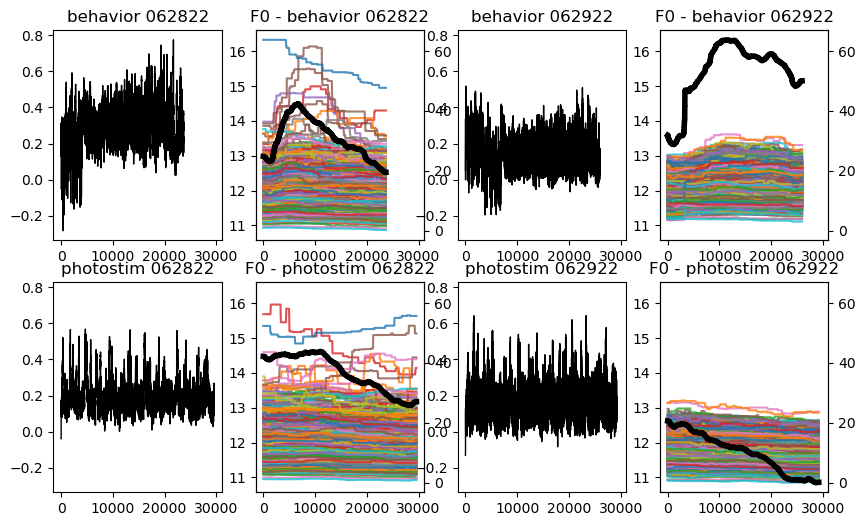

In [11]:
#cell_idx = 0
fig = plt.figure(figsize = [10,6])
ax_session = fig.add_subplot(2,4,1)
ax_session.set_title('behavior {}'.format(session))
ax_session_f0 = fig.add_subplot(2,4,2)
ax_session_f0.set_title('F0 - behavior {}'.format(session))
ax_photostim = fig.add_subplot(2,4,5,sharex = ax_session,sharey = ax_session)
ax_photostim.set_title('photostim {}'.format(session))
ax_photostim_f0 = fig.add_subplot(2,4,6,sharex = ax_session_f0,sharey = ax_session_f0)
ax_photostim_f0.set_title('F0 - photostim {}'.format(session))

ax_session_2 = fig.add_subplot(2,4,3,sharex = ax_session,sharey = ax_session)
ax_session_2.set_title('behavior {}'.format(session_2))
ax_session_f0_2 = fig.add_subplot(2,4,4,sharex = ax_session_f0,sharey = ax_session_f0)
ax_session_f0_2.set_title('F0 - behavior {}'.format(session_2))
ax_photostim_2 = fig.add_subplot(2,4,7,sharex = ax_session,sharey = ax_session)
ax_photostim_2.set_title('photostim {}'.format(session_2))
ax_photostim_f0_2 = fig.add_subplot(2,4,8,sharex = ax_session_f0,sharey = ax_session_f0)
ax_photostim_f0_2.set_title('F0 - photostim {}'.format(session_2))

ax_session_f0_ = ax_session_f0.twinx()
ax_session_f0.set_zorder(ax_session_f0_.get_zorder()+1) # put ax in front of ax2
ax_session_f0.patch.set_visible(False) # hide the 'canvas'
ax_photostim_f0_ = ax_photostim_f0.twinx()
ax_photostim_f0.set_zorder(ax_photostim_f0_.get_zorder()+1) # put ax in front of ax2
ax_photostim_f0.patch.set_visible(False) # hide the 'canvas'

ax_session_f0_2_ = ax_session_f0_2.twinx()
ax_session_f0_2.set_zorder(ax_session_f0_2_.get_zorder()+1) # put ax in front of ax2
ax_session_f0_2.patch.set_visible(False) # hide the 'canvas'
ax_photostim_f0_2_ = ax_photostim_f0_2.twinx()
ax_photostim_f0_2.set_zorder(ax_photostim_f0_2_.get_zorder()+1) # put ax in front of ax2
ax_photostim_f0_2.patch.set_visible(False) # hide the 'canvas'

ax_session_f0_.get_shared_y_axes().join(ax_session_f0_, ax_photostim_f0_,ax_session_f0_2_,ax_photostim_f0_2_)
# ax_session.plot(dFF_session[cell_idx,:])
# ax_photostim.plot(dFF_photostim[cell_idx,:])

ax_session_f0_.plot(F0_session.T,alpha = .8)
ax_photostim_f0_.plot(F0_photostim.T, alpha = .8)
ax_session_f0_2_.plot(F0_session_2.T,alpha = .8)
ax_photostim_f0_2_.plot(F0_photostim_2.T, alpha = .8)

dff_session_maxed = dFF_session.copy()
dff_session_maxed[dff_session_maxed>10]=10
dff_session_maxed[dff_session_maxed<-3]=-3
dff_photostim_maxed = dFF_photostim.copy()
dff_photostim_maxed[dff_photostim_maxed>10]=10
dff_photostim_maxed[dff_photostim_maxed<-3]=-3

dff_session_maxed_2= dFF_session_2.copy()
dff_session_maxed_2[dff_session_maxed_2>10]=10
dff_session_maxed_2[dff_session_maxed_2<-3]=-3
dff_photostim_maxed_2 = dFF_photostim_2.copy()
dff_photostim_maxed_2[dff_photostim_maxed_2>10]=10
dff_photostim_maxed_2[dff_photostim_maxed_2<-3]=-3

ax_session.plot(np.mean(dff_session_maxed,0),'k-',linewidth = 1)
ax_photostim.plot(np.mean(dff_photostim_maxed,0),'k-',linewidth = 1)
ax_session_f0.plot(np.mean(F0_session,0),'k-',linewidth = 4)
ax_photostim_f0.plot(np.mean(F0_photostim,0),'k-',linewidth = 4)

ax_session_2.plot(np.mean(dff_session_maxed_2,0),'k-',linewidth = 1)
ax_photostim_2.plot(np.mean(dff_photostim_maxed_2,0),'k-',linewidth = 1)
ax_session_f0_2.plot(np.mean(F0_session_2,0),'k-',linewidth = 4)
ax_photostim_f0_2.plot(np.mean(F0_photostim_2,0),'k-',linewidth = 4)



#ax_session.set_xlim([0,10000])
#mpld3.display(fig)
# is the activity during photostim comparable to the activity during behavior??

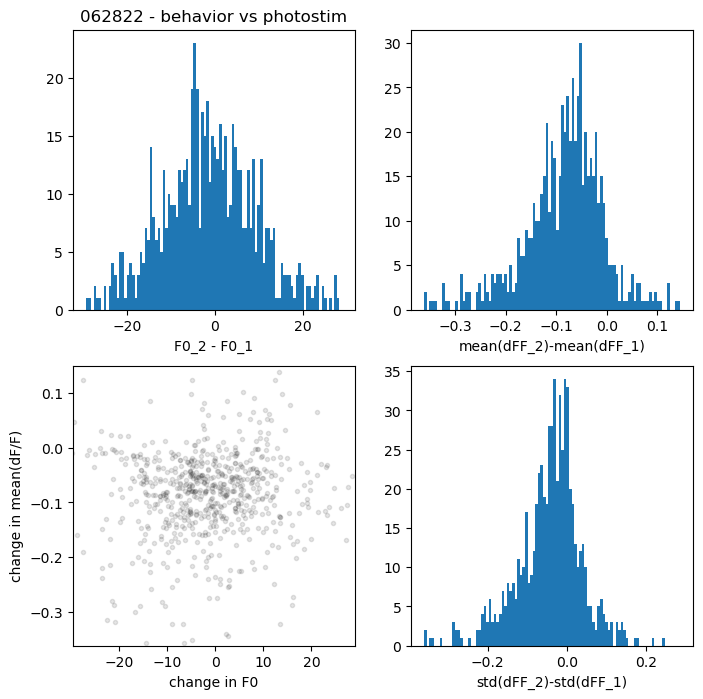

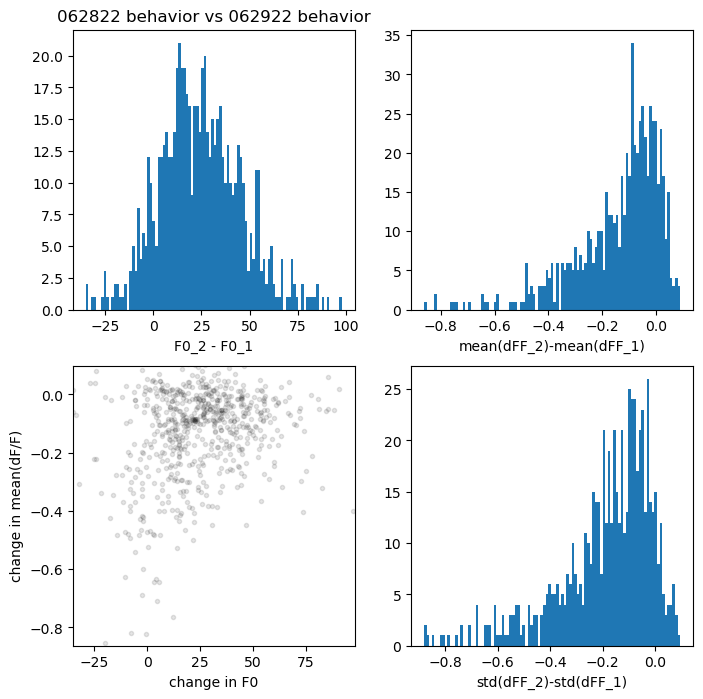

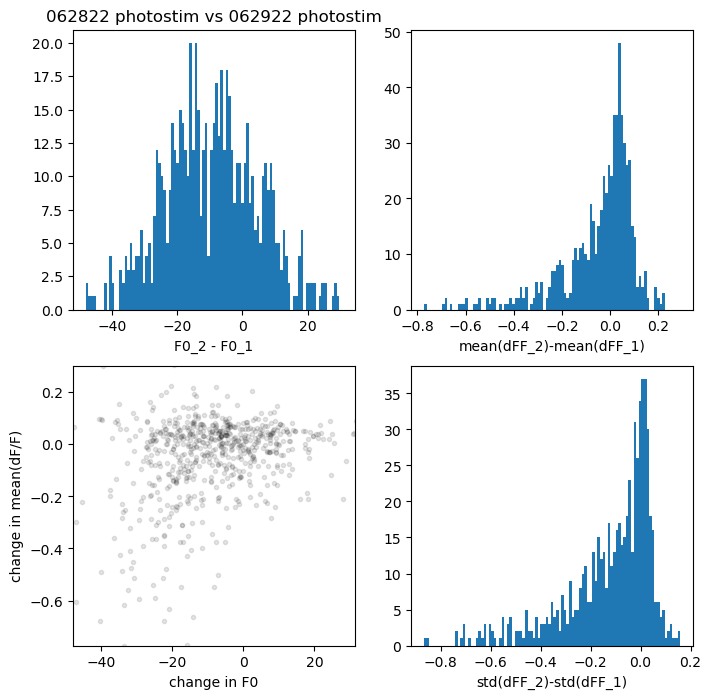

In [95]:
def statistics_changes(dFF_session,dFF_photostim,F0_scalar_session,F0_scalar_photostim, title = ''):

    dff_session_filt = dFF_session.copy()
    for i,line in enumerate(dff_session_filt):
        dff_session_filt[i,:] = BCI_analysis.pipeline_utils.rollingfun(line,20)
    dff_photostim_filt = dFF_photostim.copy()
    for i,line in enumerate(dff_photostim_filt):
        dff_photostim_filt[i,:] = BCI_analysis.pipeline_utils.rollingfun(line,20)

    fig = plt.figure(figsize = [8,8])
    ax_f0_change = fig.add_subplot(2,2,1)
    f0_diff = 100*(F0_scalar_photostim-F0_scalar_session)/F0_scalar_session
    pctls = np.percentile(f0_diff,[1,99])
    ax_f0_change.hist(f0_diff,np.arange(pctls[0],pctls[1],np.diff(pctls)/100))
    ax_f0_change.set_title(title)#'scalar f0 change to photostim (dF/F0%)')
    ax_f0_change.set_xlabel('F0_2 - F0_1')



    ax_dFF_change = fig.add_subplot(2,2,2)
    dFF_diff = np.nanmean(dff_photostim_filt,1)-np.nanmean(dff_session_filt,1)
    pctls = np.percentile(dFF_diff,[1,99])
    ax_dFF_change.hist(dFF_diff,np.arange(pctls[0],pctls[1],np.diff(pctls)/100))
    ax_dFF_change.set_xlabel('mean(dFF_2)-mean(dFF_1)')

    ax_dFF_std_change = fig.add_subplot(2,2,4)
    dFF_diff_std = np.nanstd(dff_photostim_filt,1)-np.nanstd(dff_session_filt,1)
    pctls = np.percentile(dFF_diff_std,[1,99])
    ax_dFF_std_change.hist(dFF_diff_std,np.arange(pctls[0],pctls[1],np.diff(pctls)/100))
    ax_dFF_std_change.set_xlabel('std(dFF_2)-std(dFF_1)')

    ax_dFF_std_vs_mean_change = fig.add_subplot(2,2,3)
    ax_dFF_std_vs_mean_change.plot(f0_diff,dFF_diff,'k.',alpha = .1)
    ax_dFF_std_vs_mean_change.set_xlim(np.percentile(f0_diff,[1,99]))
    ax_dFF_std_vs_mean_change.set_ylim(np.percentile(dFF_diff,[1,99]))
    ax_dFF_std_vs_mean_change.set_xlabel('change in F0')
    ax_dFF_std_vs_mean_change.set_ylabel('change in mean(dF/F)')
    #mpld3.display(fig)
    # is the activity during photostim comparable to the activity during behavior??
    
statistics_changes(dFF_session,
                   dFF_photostim,
                   F0_scalar_session,
                   F0_scalar_photostim,
                   title = '{} - behavior vs photostim'.format(session))

statistics_changes(dFF_session,
                   dFF_session_2,
                   F0_scalar_session,
                   F0_scalar_session_2,
                   title = '{} behavior vs {} behavior'.format(session,session_2))

statistics_changes(dFF_photostim,
                   dFF_photostim_2,
                   F0_scalar_photostim,
                   F0_scalar_photostim_2,
                   title = '{} photostim vs {} photostim'.format(session,session_2))

In [183]:
# can I distinguish photostimable and non-photostimable cells reliably?
# let's see how reliable photostim is - look at which cells are targeted and directly photostimmed - 
# and how it changes from group to group

from scipy.stats import ttest_rel

subject = 'BCI_34'
fov = 'FOV_01'
session = '062822'
scalar_f0 = False
correct_offset = False
minimum_p = 0.01

stat = np.load(os.path.join(suite2p_dir_base,setup,subject,fov,'stat.npy'), allow_pickle = True).tolist()

session_dir = os.path.join(suite2p_dir_base,setup,subject,fov,session)
photostim_dir = os.path.join(session_dir,'photostim')

photostim_groups = np.load(os.path.join(photostim_dir,'photostim_groups.npy'),allow_pickle=True).tolist()
dFF_photostim,F_photostim,F0_photostim,F0_scalar_photostim = load_and_calculate_dff(photostim_dir,
                                                                        scalar_f0 = scalar_f0,
                                                                        photostim = True,
                                                                        correct_offset = correct_offset)
ops =  np.load(os.path.join(photostim_dir,'ops.npy'),allow_pickle = True).tolist()
photostim_indices = np.concatenate([[0],np.cumsum(ops['frames_per_file'])])[:-1]
step_back = 20
step_forward = 100
baseline_offset = 10 #from step_back
baseline_length = 5# from -baseline_offset
peak_length = 5 #from peak_offset
peak_offset = 3##from trial start - gap


dFF_photostim_aligned = BCI_analysis.io_suite2p.align_trace_to_event(dFF_photostim,
                                                                     photostim_indices,
                                                                     step_back,
                                                                     step_forward)

connectivity = []
amplitude_matrix = []
f0_matrix = []
amplitude_std_matrix = []
distances_matrix = []
for group_idx in range(len(photostim_groups['groups'])):
    distances = []
    for s in stat:
        d_now = np.sqrt((photostim_groups['groups'][group_idx]['centerXY'][:,0]-s['med'][1])**2 + (photostim_groups['groups'][group_idx]['centerXY'][:,1] -s['med'][0])**2)
        distances.append(np.min(d_now))
    group_output = []
    distances_matrix.append(distances)
    #group_idx = 55
    DFF_now = dFF_photostim_aligned[:,:,np.asarray(photostim_groups['group_order'])==group_idx]
    n_repeats = DFF_now.shape[2]
    DFF_normalized = (DFF_now - np.nanmean(DFF_now[baseline_offset:baseline_offset+baseline_length,:],0)[np.newaxis,:,:])
    DFF_averaged = np.nanmean(DFF_now,2)
    f0 = np.nanmean(DFF_averaged[baseline_offset:baseline_offset+baseline_length,:],0)
    DFF_averaged_normalized = DFF_averaged-f0
    amplitudes = np.nanmean(DFF_averaged_normalized[step_back+peak_offset:step_back+peak_offset+peak_length,:],0)
    
    amplitudes_notaveraged = np.nanmean(DFF_normalized[step_back+peak_offset:step_back+peak_offset+peak_length,:,:],0)
    amplitude_matrix.append(amplitudes)
    f0_matrix.append(f0)
    amplitude_std_matrix.append(np.nanstd(amplitudes_notaveraged,axis = 1))
    percentiles = []
    ttest_ps = []
    for amplitude, amplitude_list, post_distribution in zip(amplitudes,amplitudes_notaveraged,photostim_groups['groups'][group_idx]['cell_response_distribution']):
        if amplitude>post_distribution[-1]:
            percentile = 1
        else:
            percentile = np.argmax(amplitude<post_distribution)/len(post_distribution)
        percentiles.append(percentile)
        if percentile < minimum_p/2:
            group_output.append(-1)
        elif percentile>1-minimum_p/2:
            group_output.append(+1)
        else:
            group_output.append(0)
        amplitude_list = amplitude_list[np.isnan(amplitude_list)==False]
        p = ttest_rel(np.zeros(len(amplitude_list)),amplitude_list)
        ttest_ps.append(p.pvalue)
        # if p.pvalue < .05 and amplitude<0:
        #     group_output.append(-1)
        # elif p.pvalue < .05 and amplitude>0:
        #     group_output.append(+1)
        # else:
        #     group_output.append(0) 
    connectivity.append(group_output)
    #asd


/tmp/ipykernel_9835/1463624992.py:54: RuntimeWarning: Mean of empty slice
  DFF_normalized = (DFF_now - np.nanmean(DFF_now[baseline_offset:baseline_offset+baseline_length,:],0)[np.newaxis,:,:])
/tmp/ipykernel_9835/1463624992.py:60: RuntimeWarning: Mean of empty slice
  amplitudes_notaveraged = np.nanmean(DFF_normalized[step_back+peak_offset:step_back+peak_offset+peak_length,:,:],0)


Text(0, 0.5, 'dF/F0')

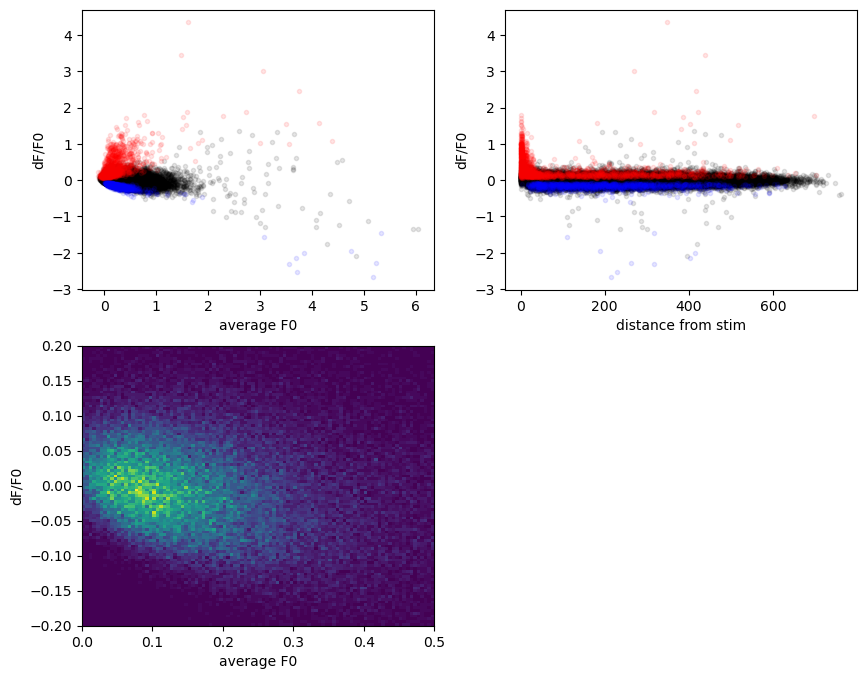

In [440]:
fig = plt.figure(figsize = [10,8])
ax_f0 = fig.add_subplot(2,2,1)
f0 = np.asarray(f0_matrix).flatten()
df = np.asarray(amplitude_matrix).flatten()
needed = np.asarray(connectivity).flatten()==0
ax_f0.plot(f0[needed],df[needed],'k.',alpha = .1)
needed = np.asarray(connectivity).flatten()>0
ax_f0.plot(f0[needed],df[needed],'r.',alpha = .1)
needed = np.asarray(connectivity).flatten()<0
ax_f0.plot(f0[needed],df[needed],'b.',alpha = .1)
#ax.set_xscale('log')
ax_f0.set_xlabel('average F0')
ax_f0.set_ylabel('dF/F0')

ax_distance = fig.add_subplot(2,2,2)
distance = np.asarray(distances_matrix).flatten()
df = np.asarray(amplitude_matrix).flatten()
needed = np.asarray(connectivity).flatten()==0
ax_distance.plot(distance[needed],df[needed],'k.',alpha = .1)
needed = np.asarray(connectivity).flatten()>0
ax_distance.plot(distance[needed],df[needed],'r.',alpha = .1)
needed = np.asarray(connectivity).flatten()<0
ax_distance.plot(distance[needed],df[needed],'b.',alpha = .1)
#ax_distance.set_xscale('log')
ax_distance.set_xlabel('distance from stim')
ax_distance.set_ylabel('dF/F0')

ax_f0_corrs = fig.add_subplot(2,2,3)

needed = np.asarray(connectivity).flatten()==0
ax_f0_corrs.hist2d(f0[needed],df[needed],range = [[0,.5],[-.2,.2]],bins = 100,cmin = 0, cmax = 100)
#ax_f0_corrs.set_xscale('log')
ax_f0_corrs.set_xlabel('average F0')
ax_f0_corrs.set_ylabel('dF/F0')

0.2

In [335]:
upper_percentiles[bin_i]

1.0

photostim offset from trial start is 0 frames
photostim offset from trial start is 0 frames


Text(0, 0.5, 'F0')

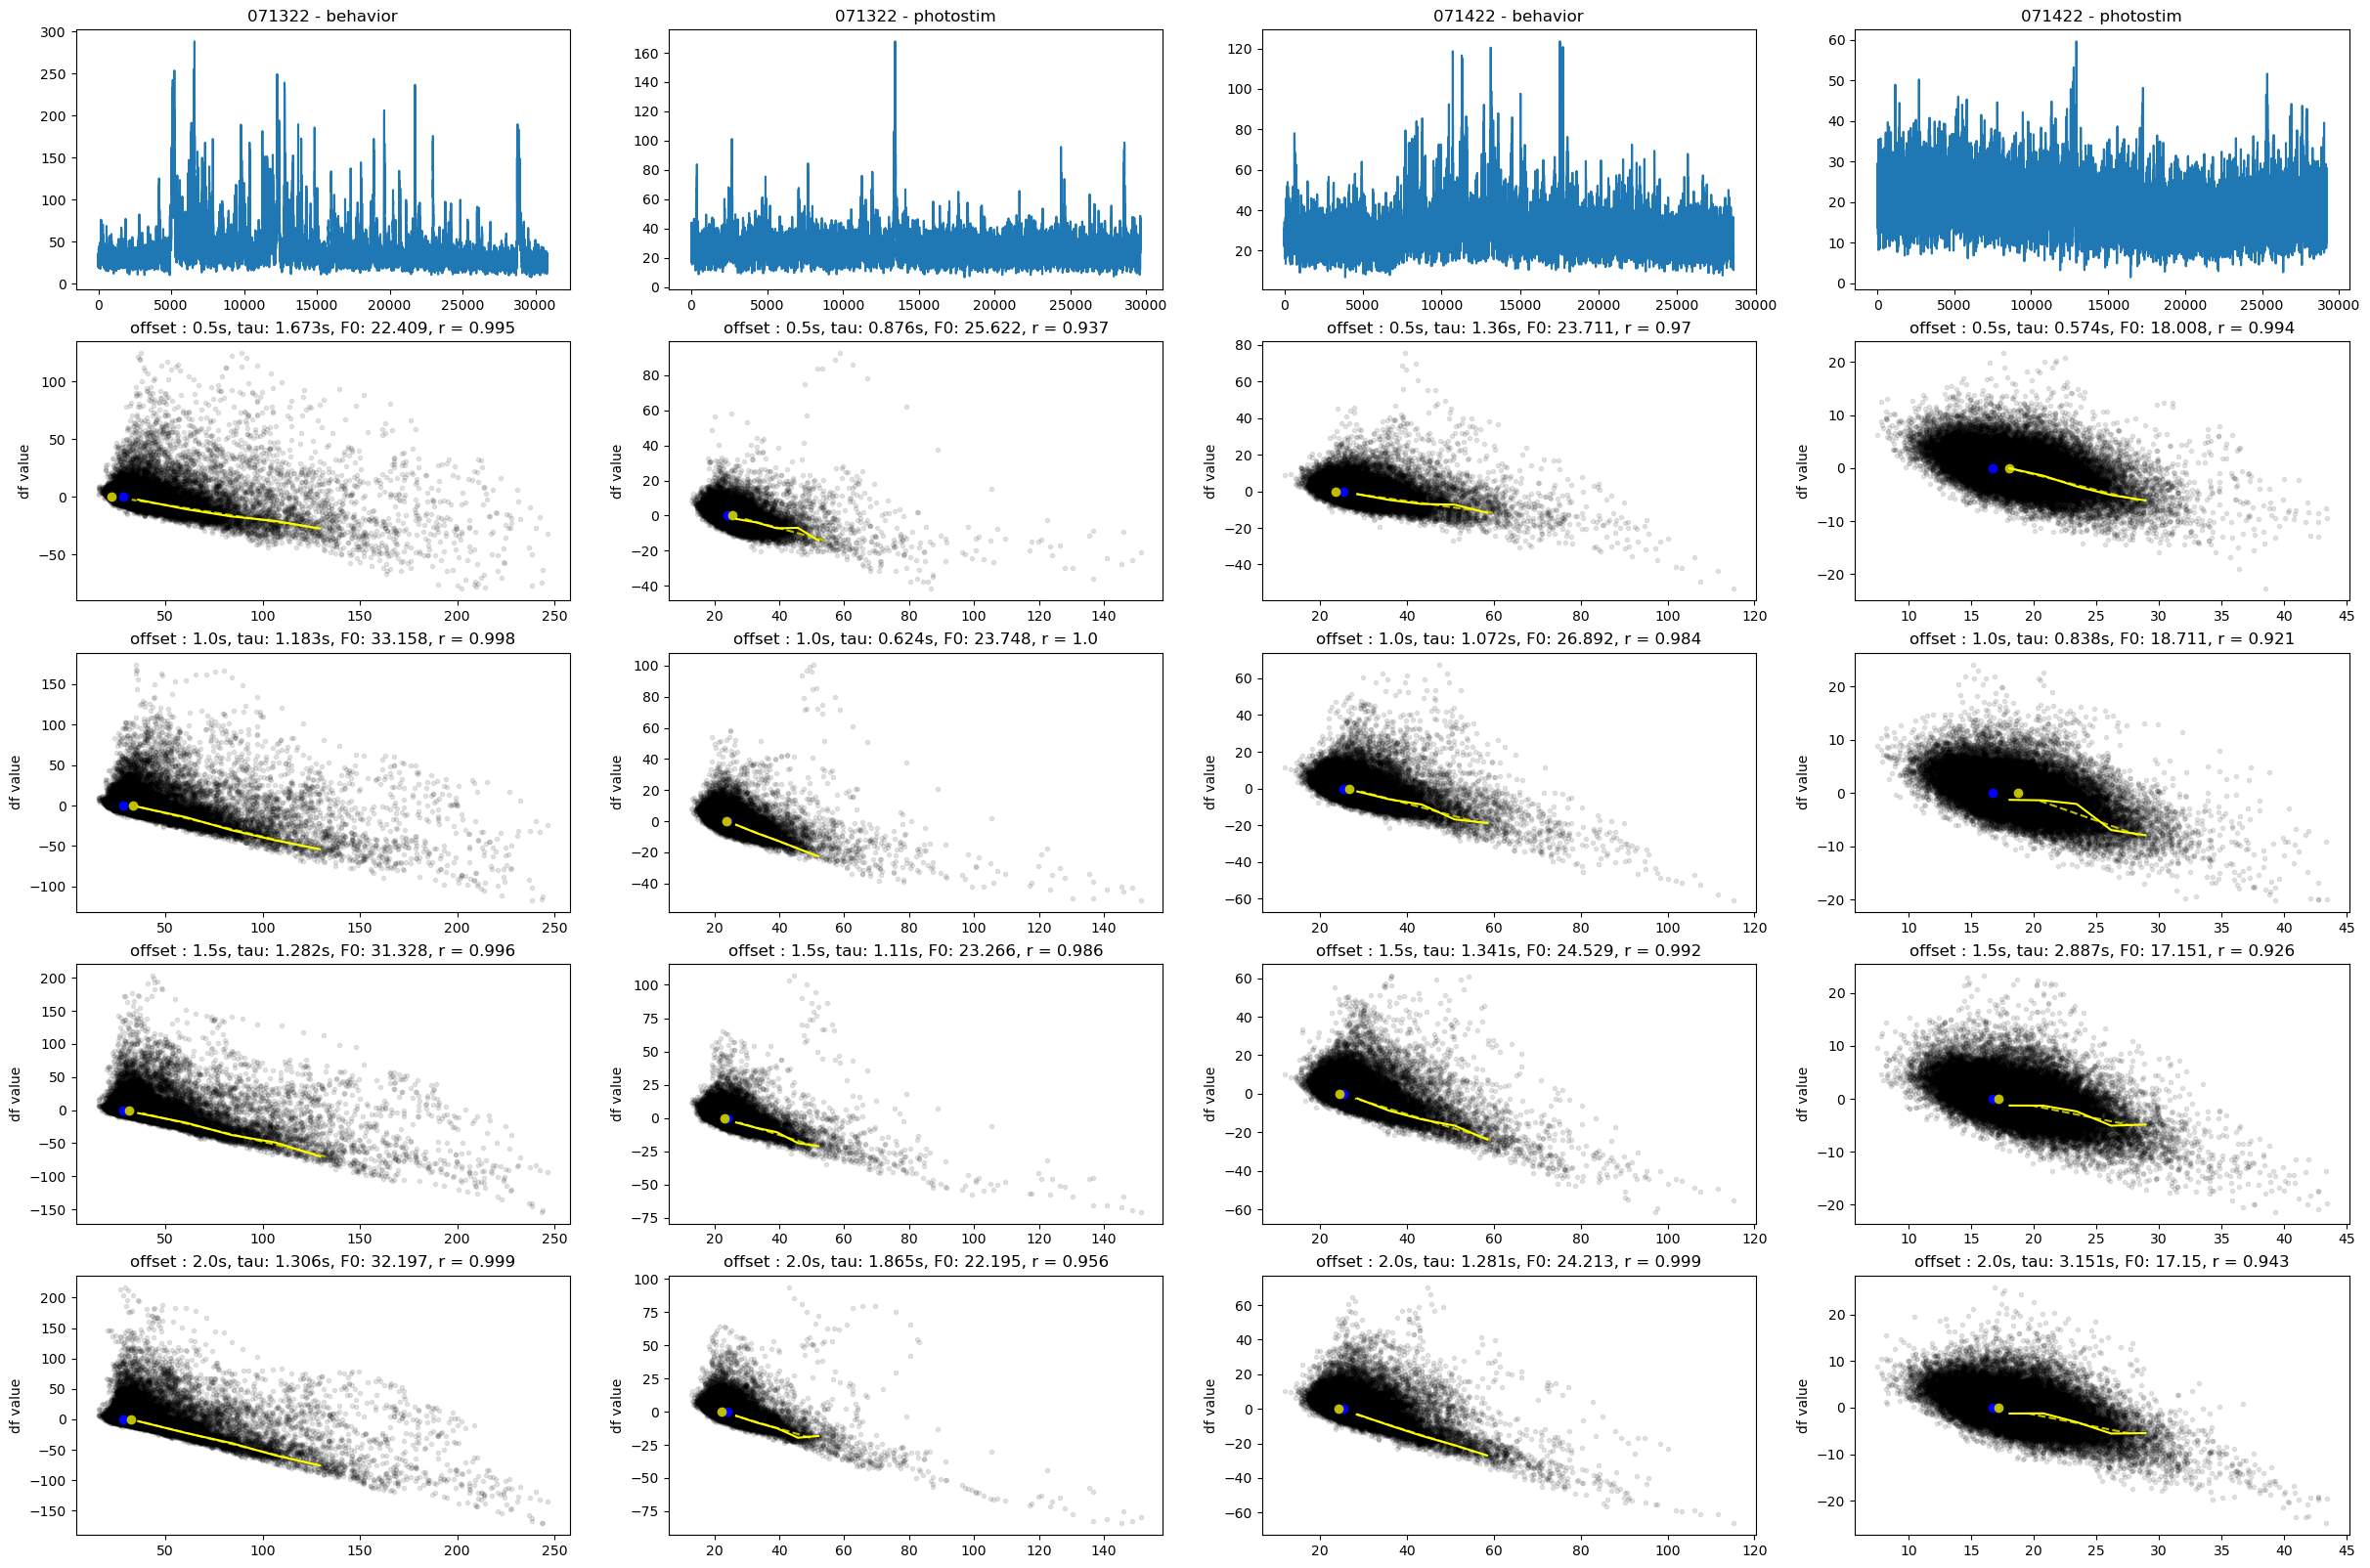

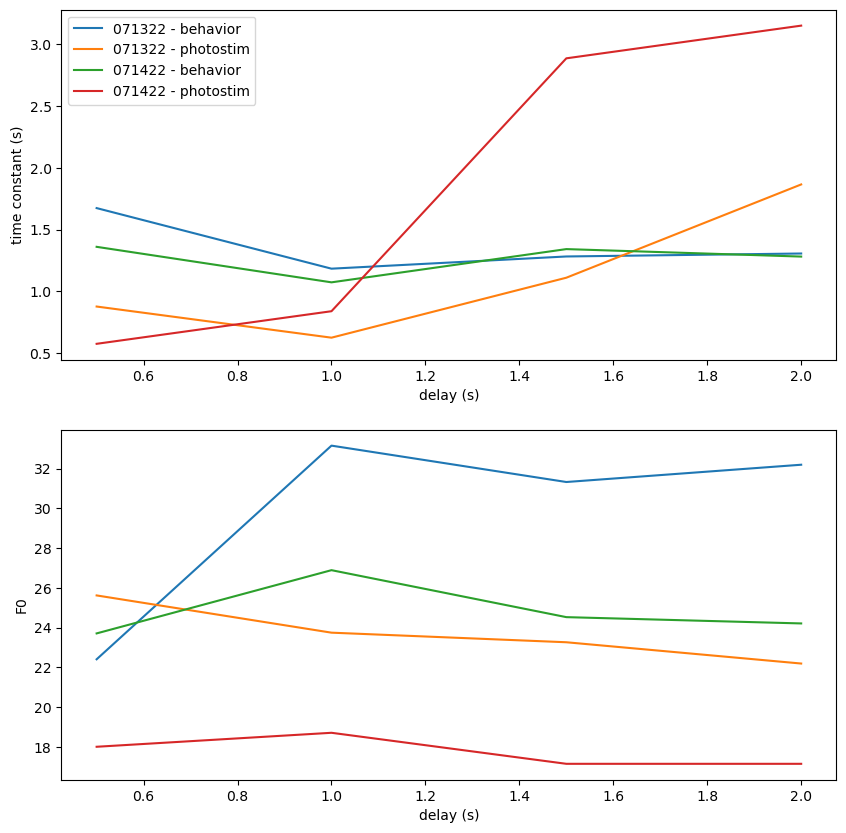

In [366]:
# fit decay for the same cell for different sessions and with different time delays

cell_idx = 10
subject = 'BCI_34'
fov = 'FOV_03'
sessions = ['071322','071422']
dff_range = [1,5]
minimum_dff_max = 2
bin_num = 5
fig = plt.figure(figsize  = [30,20])
fig_sum = plt.figure(figsize = [10,10])
ax_tau = fig_sum.add_subplot(2,1,1)    
ax_f0 = fig_sum.add_subplot(2,1,2)


stat = np.load(os.path.join(suite2p_dir_base,setup,subject,fov,'stat.npy'), allow_pickle = True).tolist()
ops =  np.load(os.path.join(photostim_dir,'ops.npy'),allow_pickle = True).tolist()
photostim_indices = np.concatenate([[0],np.cumsum(ops['frames_per_file'])])[:-1]

baseline_length = 5# from -baseline_offset
peak_length = 5 #from peak_offset

calculated_f0s = []
calculated_taus = []
dynamic_range = []


offsets  =np.asarray([10,20,30,40])
si =.05 # sample interval, 20Hz
col_now = 0
cols = len(sessions*2)
rows = len(offsets)+1
for session in sessions:
    session_dir = os.path.join(suite2p_dir_base,setup,subject,fov,session)
    photostim_dir = os.path.join(session_dir,'photostim')
    photostim_groups = np.load(os.path.join(photostim_dir,'photostim_groups.npy'),allow_pickle=True).tolist()
    dFF_photostim,F_photostim,F0_photostim,F0_scalar_photostim = load_and_calculate_dff(photostim_dir,
                                                                                        scalar_f0 = False,
                                                                                        photostim = True,
                                                                                        correct_offset = False)
    dFF_session,F_session, F0_session,F0_scalar_session = load_and_calculate_dff(session_dir,
                                                                                 scalar_f0 = False,
                                                                                 photostim = False,
                                                                                 correct_offset=False)

    for recording_type in ['behavior','photostim']:
        col_now +=1
        if recording_type == 'photostim':
            F0 = F0_scalar_photostim[cell_idx][0]
            F_trace = F_photostim[cell_idx,:]
        elif recording_type == 'behavior':
            F0 = F0_scalar_session[cell_idx][0]
            F_trace = F_session[cell_idx,:]
        ax_trace = fig.add_subplot(rows,cols,col_now)
        ax_trace.plot(F_trace)
        recording_session_text = '{} - {}'.format(session,recording_type)
        ax_trace.set_title(recording_session_text)
        taus = []
        fitted_f0s = []
        f0_origs = []
        for row_i,offset in enumerate(offsets):
            # group_f0s_ALL = []
            # corrected_group_amplitudes_ALL = []
            # group_amplitudes_ALL = []
            # group_percentiles_ALL = []
            # corrected_group_percentiles_ALL = []
            
            f0 = BCI_analysis.pipeline_utils.rollingfun(F_trace,baseline_length)
            fpeak = BCI_analysis.pipeline_utils.rollingfun(F_trace,peak_length)

            amplitudes = fpeak[offset:]-f0[:-offset]
            f0s = f0[:-offset]
            
            corrcoeff = 0
            diff_max_offset =0
            while corrcoeff <.95 and minimum_dff_max<dff_range[1]+diff_max_offset:
            
                bin_mean = []
                bin_center = []
                bin_std = []
                bin_n = []
                x_range = np.percentile(f0s,[1,99])
                x_range[0] = np.max([F0*dff_range[0],x_range[0]])
                x_range[1] = np.min([F0*(dff_range[1]+diff_max_offset),x_range[1]])

                # lower_percentiles = 100*np.arange(bin_num)/bin_num
                # upper_percentiles = 100*np.arange(bin_num)/bin_num+1/bin_num
                f0s_used = f0s[(f0s>x_range[0])&(f0s<x_range[1])]
                for bin_i in np.arange(bin_num):
                    min_x_val = x_range[0]+bin_i*np.diff(x_range)/bin_num
                    max_x_val = x_range[0]+(bin_i+1)*np.diff(x_range)/bin_num
                    # min_x_val = np.percentile(f0s_used,lower_percentiles[bin_i])
                    # max_x_val = np.percentile(f0s_used,upper_percentiles[bin_i])


                    needed_idx = (f0s>min_x_val) & (f0s<max_x_val)
                    f0_now = f0s[needed_idx]
                    amplitudes_now = amplitudes[needed_idx]
                    amplitudes_now = amplitudes_now[np.isnan(amplitudes_now)==False]
                    while len(amplitudes_now)>10:
                        y,x = np.histogram(amplitudes_now,10)
                        x = np.nanmean([x[:-1],x[1:]],0)
                        range_now = (np.nanmax(amplitudes_now) - np.nanmin(amplitudes_now))/5
                        center_val = x[np.argmax(y)]
                        needed = (amplitudes_now>center_val-range_now) & (amplitudes_now<center_val+range_now)
                        amplitudes_now = amplitudes_now[needed]
                    n = len(needed_idx)
                    bin_center.append(np.nanmean(f0_now))
                    bin_mean.append(np.nanmean(amplitudes_now))
                    bin_std.append(0)
                    bin_n.append(n)
                p = np.polyfit(bin_mean,bin_center,1)
                corrcoeff = -1*np.corrcoef(bin_mean,bin_center)[0,1]
                if corrcoeff<.95:
                    diff_max_offset-=.5
            pp =  np.polyfit(bin_center,bin_mean,1)
            m = pp[0]
            tau_real = (-1*offset*.05)/(np.log((1+m)/1))
            f0_calc = p[1]
            taus.append(tau_real)
            fitted_f0s.append(f0_calc)
            f0_origs.append(F0)
            #print('offset - {}, tau: {}'.format(offset, round(tau_real,3)))
            
            
            
            ax_current = fig.add_subplot(rows,cols,col_now+cols*(row_i+1))
            ax_current.plot(f0s,amplitudes,'k.',alpha = .1)
            if row_i == rows-1:
                ax_current.set_xlabel('f0 value')
            ax_current.set_ylabel('df value')
            ax_current.set_title('offset : {}s, tau: {}s, F0: {}, r = {}'.format(offset*si,np.round(tau_real,3),np.round(f0_calc,3),np.round(corrcoeff,3)))
            ax_current.plot(F0,0,'bo')
            ax_current.errorbar(bin_center,bin_mean,bin_std,color = 'yellow')
            ax_current.plot(p[1],0,'yo')
            ax_current.plot(np.polyval(p,np.unique(bin_mean)),np.unique(bin_mean),'y--')
        
        ax_tau.plot(offsets*si,taus,label = recording_session_text)
        ax_f0.plot(offsets*si,fitted_f0s,label = recording_session_text)

ax_tau.legend()
ax_tau.set_xlabel('delay (s)')
ax_tau.set_ylabel('time constant (s)')

ax_f0.set_xlabel('delay (s)')
ax_f0.set_ylabel('F0')

-0.9990393183637448

In [295]:
offset

30

In [6]:
photostim_data_dict = {}

photostim offset from trial start is 0 frames


NameError: name 'sdas' is not defined

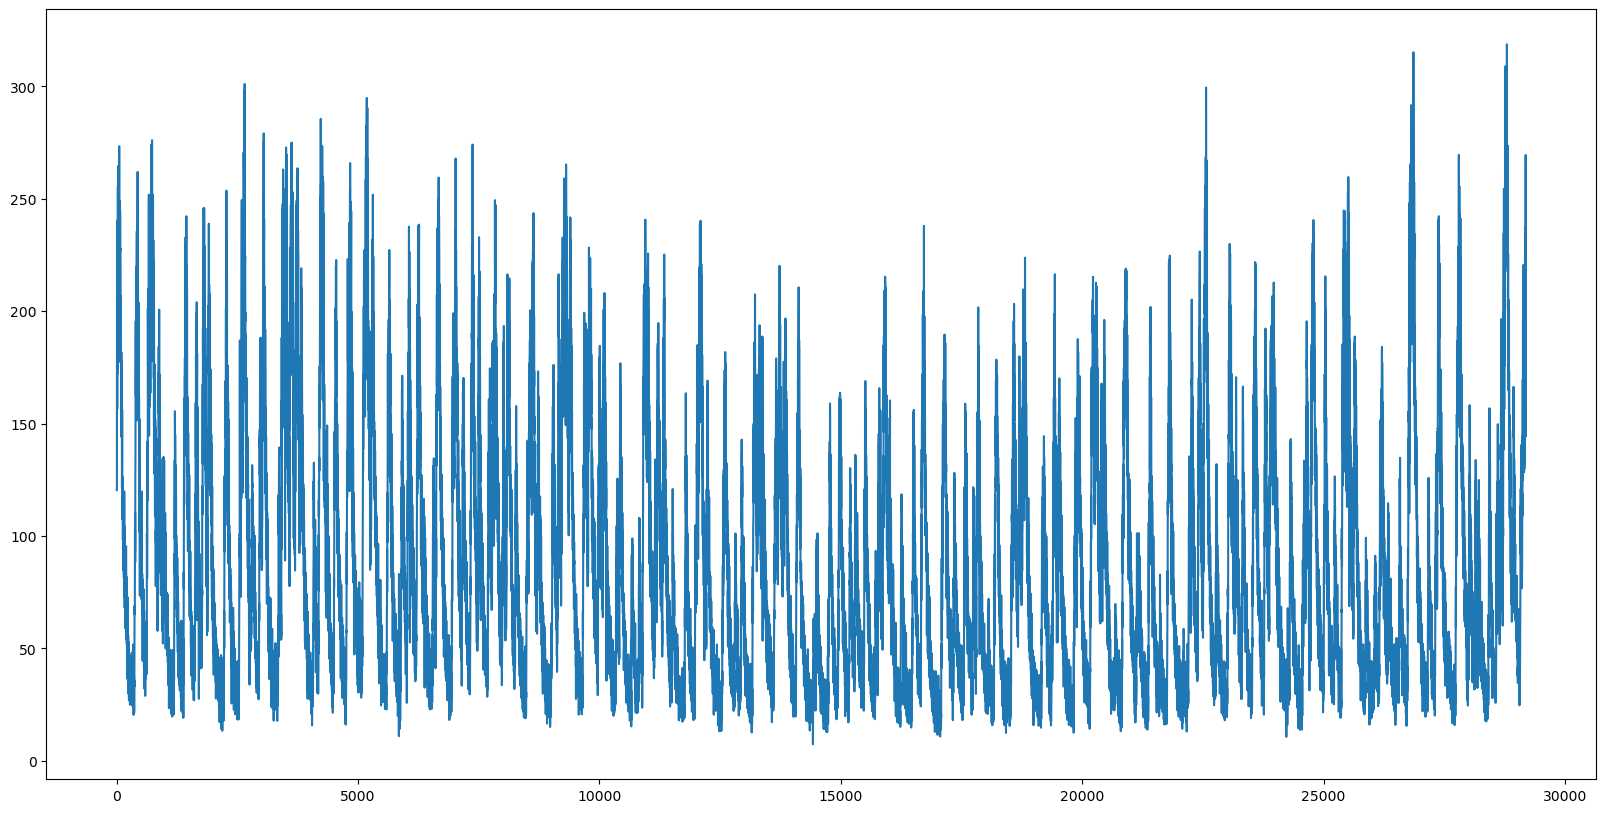

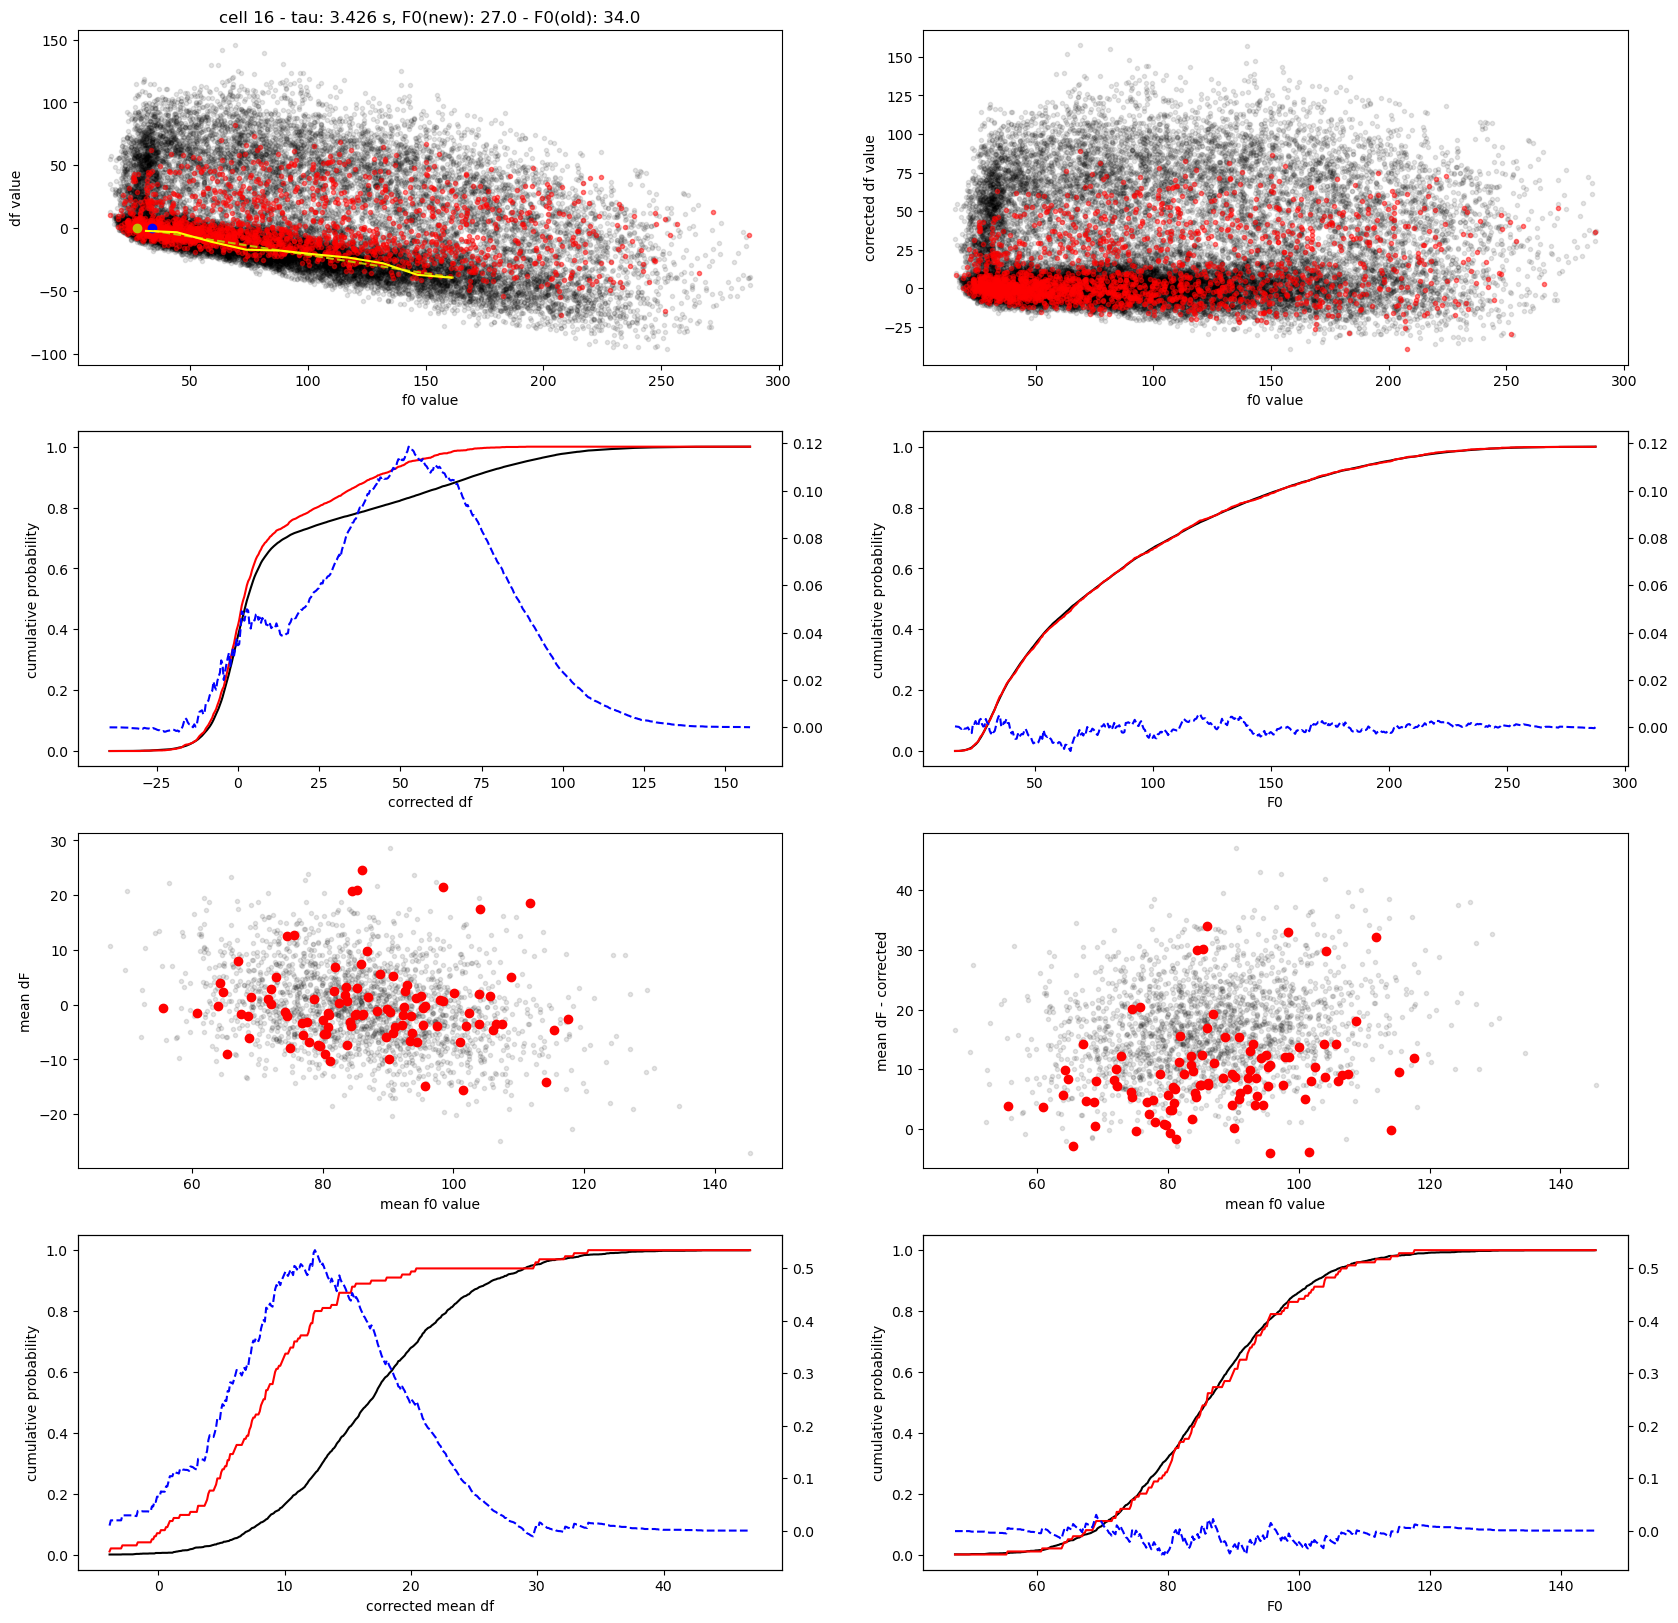

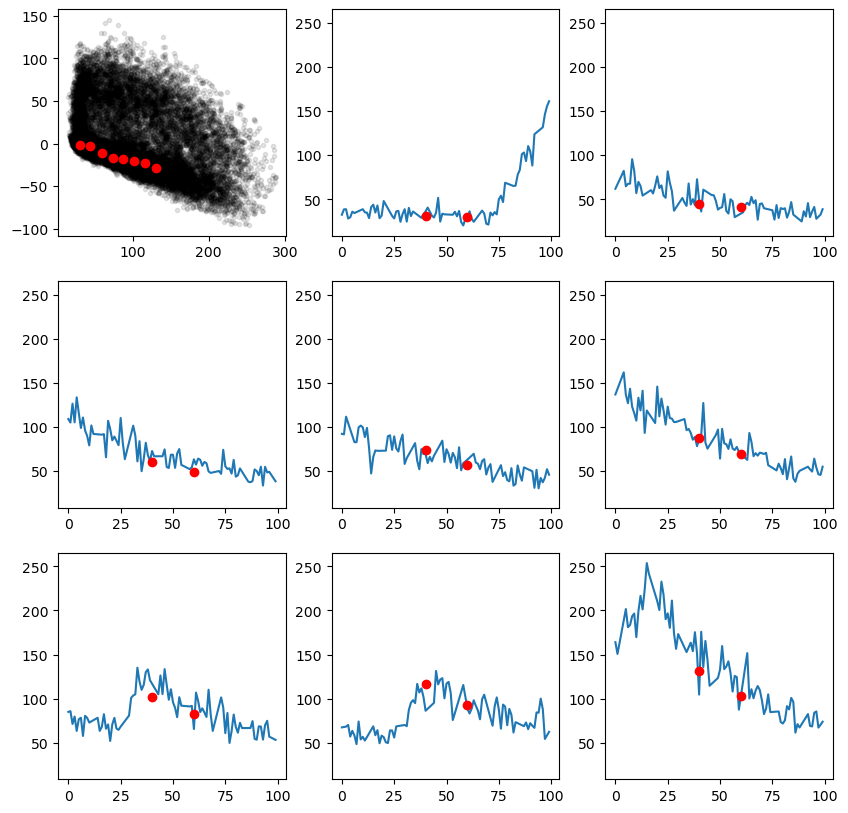

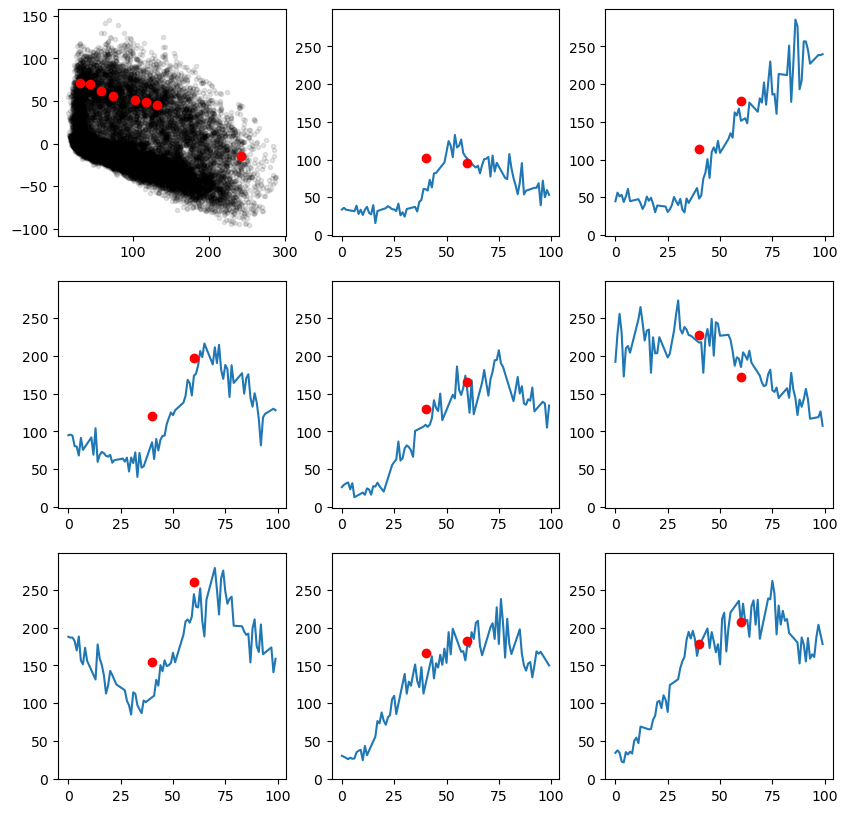

In [193]:
# estimating decay time constant for all cells - and correcting photostim amplitudes with that  -first iteration
import random
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')

    
subject = 'BCI_34'
fov = 'FOV_03'#'FOV_01'
session = '071422'#'063022'
use_taus_from_session = 'NONE'#'071322' # reuse taus
scalar_f0 = False
correct_offset = False
stat = np.load(os.path.join(suite2p_dir_base,setup,subject,fov,'stat.npy'), allow_pickle = True).tolist()
session_dir = os.path.join(suite2p_dir_base,setup,subject,fov,session)
photostim_dir = os.path.join(session_dir,'photostim')
photostim_groups = np.load(os.path.join(photostim_dir,'photostim_groups.npy'),allow_pickle=True).tolist()
dFF_photostim,F_photostim,F0_photostim,F0_scalar_photostim = load_and_calculate_dff(photostim_dir,
                                                                        scalar_f0 = scalar_f0,
                                                                        photostim = True,
                                                                        correct_offset = correct_offset)
ops =  np.load(os.path.join(photostim_dir,'ops.npy'),allow_pickle = True).tolist()
photostim_indices = np.concatenate([[0],np.cumsum(ops['frames_per_file'])])[:-1]
step_back = 20
step_forward = 40
baseline_offset = 12 #from step_back
baseline_length = 5# from -baseline_offset
peak_length = 5 #from peak_offset
peak_offset = 3##from trial start - gap


offset_photostim = int(step_back-baseline_offset-baseline_length/2 + peak_length/2 + peak_offset) # for correcting amplitudes
offset =  20#offset_photostim#20# # for measuring decay time, in frames
plot = True
cell_idx_to_plot = 16
calculated_f0s = []
calculated_taus = []
dynamic_range = []

F_photostim_aligned = BCI_analysis.io_suite2p.align_trace_to_event(F_photostim,
                                                                   photostim_indices,
                                                                   step_back,
                                                                   step_forward)
group_f0s_ALL = []
corrected_group_amplitudes_ALL = []
group_amplitudes_ALL = []
group_percentiles_ALL = []
corrected_group_percentiles_ALL = []
for cell_idx in range(len(F0_scalar_photostim)):
    bin_num = 10
    F0 = F0_scalar_photostim[cell_idx][0]
    F_trace = F_photostim[cell_idx,:]#dFF_photostim[cell_idx,:]#
    
    ##F_trace = F_session[cell_idx,:]
    
    f0 = BCI_analysis.pipeline_utils.rollingfun(F_trace,baseline_length)
    fpeak = BCI_analysis.pipeline_utils.rollingfun(F_trace,peak_length)
    
    amplitudes = fpeak[offset:]-f0[:-offset]
    f0s = f0[:-offset]
    
    bin_mean = []
    bin_center = []
    bin_std = []
    bin_n = []
    x_range = np.percentile(f0s,[1,99])
    x_range[1] = np.min([F0*5,x_range[1]])

    for bin_i in np.arange(bin_num):
        min_x_val = x_range[0]+bin_i*np.diff(x_range)/bin_num
        max_x_val = x_range[0]+(bin_i+1)*np.diff(x_range)/bin_num

        needed_idx = (f0s>min_x_val) & (f0s<max_x_val)
        f0_now = f0s[needed_idx]
        amplitudes_now = amplitudes[needed_idx]
        amplitudes_now = amplitudes_now[np.isnan(amplitudes_now)==False]
        #amplitudes_prctl_5 = np.percentile(amplitudes_now,5)
        while len(amplitudes_now)>10:
            y,x = np.histogram(amplitudes_now,10)
            x = np.nanmean([x[:-1],x[1:]],0)
            range_now = (np.nanmax(amplitudes_now) - np.nanmin(amplitudes_now))/5
            center_val = x[np.argmax(y)]
            needed = (amplitudes_now>center_val-range_now) & (amplitudes_now<center_val+range_now)
            amplitudes_now = amplitudes_now[needed]
        n = len(needed_idx)
        # bin_center.extend([np.nanmean(f0_now)]*n)
        # bin_mean.extend([np.nanmean(amplitudes_now)]*n)
        # bin_std.extend([0]*n)
        # bin_n.append(n)
        bin_center.append(np.nanmean(f0_now))
        bin_mean.append(np.nanmean(amplitudes_now))
        bin_std.append(0)
        bin_n.append(n)
        
        
    
    
#     ### fitting roboustly to outliers - this could be much simpler
#     try:
#         x_scaler, y_scaler = StandardScaler(), StandardScaler()
#         x_train = x_scaler.fit_transform(np.asarray(bin_center)[..., None])
#         y_train = y_scaler.fit_transform(np.asarray(bin_mean)[..., None])

#         # fit model
#         model = HuberRegressor(epsilon=1)
#         model.fit(x_train, y_train.ravel())

#         # do some predictions
#         test_x = np.array(bin_center)
#         predictions = y_scaler.inverse_transform(
#             model.predict(x_scaler.transform(test_x[..., None]))[...,None]
#         )

#         ### fitting roboustly to outliers
#         p = np.polyfit(predictions.flatten(),bin_center,1)
#     except:
#         print('cell {} roboust fit fail'.format(cell_idx))
    p = np.polyfit(bin_mean,bin_center,1)
    tau_real = 1/(-1/p[0])/(offset*.05)
#     # if fit is messed up, we go back to values that make more sense
#     if -1*p[0]<1:
#         p[0] = -1
#         p[1] = F0
        
#     elif -1*p[0]>6:
#         p[0] = -6
#         p[1] = F0
#     try:
#         p[0] = photostim_data_dict[use_taus_from_session]['fitted_tau'][cell_idx]*-1
#         p[1] = F0
#         print('tau reused')
#     except:
#         pass
        
    
    time_constant_t = p[0]*-1
    timeConstant = 1000 * time_constant_t / (50*offset) # change in 10 steps
    correction = (f0s-p[1])/timeConstant*(20/offset)
    amplitudes_corrected = amplitudes+correction
    
    group_f0s_all = []
    corrected_group_amplitudes_all = []
    group_amplitudes_all = []
    
    group_mean_amplitudes_random = []
    group_mean_amplitudes_random_corrected = []
    group_mean_f0s_random = []
    group_percentiles = []
    for group_idx in range(len(photostim_groups['groups'])):
        F_now = F_photostim_aligned[:,cell_idx,np.asarray(photostim_groups['group_order'])==group_idx]
        repeats = F_now.shape[1]
        group_stim_F0s = np.nanmean(F_now[baseline_offset:baseline_offset+baseline_length,:],0)########
        group_stim_Fpeaks = np.nanmean(F_now[step_back+peak_offset:step_back+peak_offset+peak_length,:],0)
        group_amplitudes = group_stim_Fpeaks-group_stim_F0s
        group_correction = (group_stim_F0s-p[1])/timeConstant*(offset_photostim/offset) #
        corrected_group_amplitudes = group_correction+ group_amplitudes
        corrected_group_amplitudes_all.append(corrected_group_amplitudes)
        group_amplitudes_all.append(group_amplitudes)
        group_f0s_all.append(group_stim_F0s)
        mean_amplitudes_corrected = []
        mean_amplitudes = []
        mean_f0s = []
        for i in range(20):
            random_indices = random.sample(range(len(amplitudes_corrected)),repeats)
            mean_amplitudes_corrected.append(np.nanmean(amplitudes_corrected[random_indices]))
            mean_amplitudes.append(np.nanmean(amplitudes[random_indices]))
            mean_f0s.append(np.nanmean(f0s[random_indices]))
            
        group_mean_amplitudes_random_corrected.append(mean_amplitudes_corrected)
        group_mean_amplitudes_random.append(mean_amplitudes)
        group_mean_f0s_random.append(mean_f0s)
        
        
        
        post_distribution=np.sort(mean_amplitudes)
        if np.mean(group_amplitudes)>post_distribution[-1]:
            percentile = 1
        else:
            percentile = np.argmax(np.mean(group_amplitudes)<post_distribution)/len(post_distribution)
        group_percentiles.append(percentile)
    
    post_distribution=np.sort(np.concatenate(group_mean_amplitudes_random))
    post_distribution_corrected=np.sort(np.concatenate(group_mean_amplitudes_random_corrected))
    stim_group_mean_percentiles= []
    stim_group_mean_percentiles_corrected = []
    for amps,amps_corr in zip( group_amplitudes_all    ,corrected_group_amplitudes_all): #iterate over groups, calculate mean amplitude and see how significant it is
        if np.nanmean(amps)>post_distribution[-1]:
            percentile = 1
        else:
            percentile = np.argmax(np.mean(amps)<post_distribution)/len(post_distribution)
        stim_group_mean_percentiles.append(percentile)
        
        if np.nanmean(amps_corr)>post_distribution_corrected[-1]:
            percentile = 1
        else:
            percentile = np.argmax(np.mean(amps_corr)<post_distribution_corrected)/len(post_distribution_corrected)
        stim_group_mean_percentiles_corrected.append(percentile)
        
            
    
    
    group_f0s_ALL.append(group_f0s_all)
    corrected_group_amplitudes_ALL.append(corrected_group_amplitudes_all)
    group_amplitudes_ALL.append(group_amplitudes_all)
    group_percentiles_ALL.append(stim_group_mean_percentiles)
    corrected_group_percentiles_ALL.append(stim_group_mean_percentiles_corrected)
    
    calculated_f0s.append(p[1])
    calculated_taus.append(timeConstant)#p[0]*-1)
    max_f = np.max(fpeak)
    dynamic_range.append((max_f-p[1])/p[1])    
        
        
    
    
    
    if plot and cell_idx == cell_idx_to_plot:
        fig = plt.figure(figsize = [20,10])
        ax = fig.add_subplot(1,1,1)
        ax.plot(F_trace)#-F0)/F0)
        fig = plt.figure(figsize = [20,20])
        ax_current = fig.add_subplot(4,2,1)
        ax_current.plot(f0s,amplitudes,'k.',alpha = .1)
        
        ax_current.set_xlabel('f0 value')
        ax_current.set_ylabel('df value')
        ax_current.set_title('cell {} - tau: {} s, F0(new): {} - F0(old): {}'.format(cell_idx,np.round(tau_real,3),np.round(p[1]),np.round(F0)))
        ax_current.plot(np.concatenate(group_f0s_all),np.concatenate(group_amplitudes_all),'r.',alpha = .5)
        ax_current.plot(F0,0,'bo')
        ax_current.errorbar(bin_center,bin_mean,bin_std,color = 'yellow')
        ax_current.plot(p[1],0,'yo')
        ax_current.plot(np.polyval(p,np.unique(bin_mean)),np.unique(bin_mean),'y--')
        
        
        ax_corrected = fig.add_subplot(4,2,2)
        ax_corrected.plot(f0s,amplitudes_corrected,'k.',alpha = .1)
        ax_corrected.set_xlabel('f0 value')
        ax_corrected.set_ylabel('corrected df value')

        ax_corrected.plot(np.concatenate(group_f0s_all),np.concatenate(corrected_group_amplitudes_all),'r.',alpha = .5)

        ax_hist = fig.add_subplot(4,2,3)
        hist_range = [np.nanmin(np.concatenate([np.concatenate(corrected_group_amplitudes_all),amplitudes_corrected])),
                      np.nanmax(np.concatenate([np.concatenate(corrected_group_amplitudes_all),amplitudes_corrected]))]
        y,x = np.histogram(amplitudes_corrected,bins = 500,range = hist_range)
        y_stim,xx = np.histogram(np.concatenate(corrected_group_amplitudes_all),x)
        x = np.mean([x[:-1],x[1:]],0)
        pdf_y = np.cumsum(y)/np.sum(y)
        ax_hist.plot(x,pdf_y,'k-')
        pdf_y_stim = np.cumsum(y_stim)/np.sum(y_stim)
        # ax_hist_2 = ax_hist.twinx()
        # ax_hist_2.hist(np.concatenate(corrected_group_amplitudes_all))
        ax_hist.plot(x,pdf_y_stim,'r-')
        ax_hist_diff = ax_hist.twinx()
        ax_hist_diff.plot(x,pdf_y_stim-pdf_y,'b--')
        ax_hist.set_xlabel('corrected df')
        ax_hist.set_ylabel('cumulative probability')
        #ax_hist.set_xscale('log')


        ax_hist_f0 = fig.add_subplot(4,2,4)
        hist_range = [np.nanmin(np.concatenate([np.concatenate(group_f0s_all),f0s])),
                      np.nanmax(np.concatenate([np.concatenate(group_f0s_all),f0s]))]
        y,x = np.histogram(f0s,bins = 500,range = hist_range)
        y_stim,xx = np.histogram(np.concatenate(group_f0s_all),x)
        x = np.mean([x[:-1],x[1:]],0)
        pdf_y = np.cumsum(y)/np.sum(y)
        ax_hist_f0.plot(x,pdf_y,'k-')
        pdf_y_stim = np.cumsum(y_stim)/np.sum(y_stim)
        # ax_hist_2 = ax_hist.twinx()
        # ax_hist_2.hist(np.concatenate(corrected_group_amplitudes_all))
        ax_hist_f0.plot(x,pdf_y_stim,'r-')
        ax_hist_f0_diff = ax_hist_f0.twinx()
        ax_hist_f0_diff.get_shared_y_axes().join(ax_hist_f0_diff, ax_hist_diff)
        ax_hist_f0_diff.plot(x,pdf_y_stim-pdf_y,'b--')
        ax_hist_f0.set_xlabel('F0')
        ax_hist_f0.set_ylabel('cumulative probability')
        
        
        
        
        
        
        ax_group_f0_amplitude = fig.add_subplot(4,2,5)
        ax_group_f0_amplitude.plot(np.concatenate(group_mean_f0s_random),np.concatenate(group_mean_amplitudes_random),'k.',alpha = .1)
        group_amps_all = []
        group_f0s_mean_all = []
        for f0s_,amps in zip(group_f0s_all,group_amplitudes_all):
            ax_group_f0_amplitude.plot(np.nanmean(f0s_),np.nanmean(amps),'ro')
            group_amps_all.append(np.nanmean(amps))
            group_f0s_mean_all.append(np.nanmean(f0s_))

        ax_group_f0_amplitude.set_xlabel('mean f0 value')
        ax_group_f0_amplitude.set_ylabel('mean dF')
        
        ax_group_f0_amplitude_corr = fig.add_subplot(4,2,6)
        ax_group_f0_amplitude_corr.plot(np.concatenate(group_mean_f0s_random),np.concatenate(group_mean_amplitudes_random_corrected),'k.',alpha = .1)
        group_amps_all_corr = []
        for f0s_,amps in zip(group_f0s_all,corrected_group_amplitudes_all):
            ax_group_f0_amplitude_corr.plot(np.nanmean(f0s_),np.nanmean(amps),'ro')
            group_amps_all_corr.append(np.nanmean(amps))
        
        ax_group_f0_amplitude_corr.set_xlabel('mean f0 value')
        ax_group_f0_amplitude_corr.set_ylabel('mean dF - corrected')
        
        
        
        
        
        
        
        ax_hist_group = fig.add_subplot(4,2,7)
        hist_range = [np.nanmin(np.concatenate([group_amps_all_corr,np.concatenate(group_mean_amplitudes_random_corrected)])),
                      np.nanmax(np.concatenate([group_amps_all_corr,np.concatenate(group_mean_amplitudes_random_corrected)]))]
        y,x = np.histogram(np.concatenate(group_mean_amplitudes_random_corrected),bins = 500,range = hist_range)
        y_stim,xx = np.histogram(group_amps_all_corr,x)
        x = np.mean([x[:-1],x[1:]],0)
        pdf_y = np.cumsum(y)/np.sum(y)
        ax_hist_group.plot(x,pdf_y,'k-')
        pdf_y_stim = np.cumsum(y_stim)/np.sum(y_stim)
        # ax_hist_2 = ax_hist.twinx()
        # ax_hist_2.hist(np.concatenate(corrected_group_amplitudes_all))
        ax_hist_group.plot(x,pdf_y_stim,'r-')
        ax_hist_diff_group = ax_hist_group.twinx()
        ax_hist_diff_group.plot(x,pdf_y_stim-pdf_y,'b--')
        ax_hist_group.set_xlabel('corrected mean df')
        ax_hist_group.set_ylabel('cumulative probability')
        #ax_hist.set_xscale('log')


        ax_hist_f0_group = fig.add_subplot(4,2,8)
        hist_range = [np.nanmin(np.concatenate([group_f0s_mean_all,np.concatenate(group_mean_f0s_random)])),
                      np.nanmax(np.concatenate([group_f0s_mean_all,np.concatenate(group_mean_f0s_random)]))]
        y,x = np.histogram(np.concatenate(group_mean_f0s_random),bins = 500,range = hist_range)
        y_stim,xx = np.histogram(group_f0s_mean_all,x)
        x = np.mean([x[:-1],x[1:]],0)
        pdf_y = np.cumsum(y)/np.sum(y)
        ax_hist_f0_group.plot(x,pdf_y,'k-')
        pdf_y_stim = np.cumsum(y_stim)/np.sum(y_stim)
        # ax_hist_2 = ax_hist.twinx()
        # ax_hist_2.hist(np.concatenate(corrected_group_amplitudes_all))
        ax_hist_f0_group.plot(x,pdf_y_stim,'r-')
        ax_hist_f0_diff_group = ax_hist_f0_group.twinx()
        ax_hist_f0_diff_group.get_shared_y_axes().join(ax_hist_f0_diff_group, ax_hist_diff_group)
        ax_hist_f0_diff_group.plot(x,pdf_y_stim-pdf_y,'b--')
        ax_hist_f0_group.set_xlabel('F0')
        ax_hist_f0_group.set_ylabel('cumulative probability')
        
        fig_2 = plt.figure(figsize = [10,10])
        ax_uncorrected = fig_2.add_subplot(3,3,1)
        ax_uncorrected.plot(f0s,amplitudes,'k.',alpha = .1)
        frames_edge = 50
        for i,(center,meandf) in enumerate(zip(bin_center[:8],bin_mean[:8])):
            dist = np.sqrt((f0s-center)**2+(amplitudes-meandf)**2)
            idx = np.argmax(dist[frames_edge:-frames_edge]<1)+frames_edge #np.argmax(dist<1)
            ax_uncorrected.plot(f0s[idx],amplitudes[idx],'ro')
            if i==0:
                ax_plot = fig_2.add_subplot(3,3,2+i)
            else:
                ax_plot = fig_2.add_subplot(3,3,2+i,sharey = ax_plot)
            ax_plot.plot(F_trace[idx-frames_edge:idx+frames_edge])
            ax_plot.plot(frames_edge-offset/2,f0s[idx],'ro')
            ax_plot.plot(frames_edge+offset/2,f0s[idx]+amplitudes[idx],'ro')
        
        fig_2 = plt.figure(figsize = [10,10])
        ax_uncorrected = fig_2.add_subplot(3,3,1)
        ax_uncorrected.plot(f0s,amplitudes,'k.',alpha = .1)
        frames_edge = 50
        for i,(center,meandf) in enumerate(zip(bin_center[:8],bin_mean[:8])):
            meandf = meandf+np.nanmax(amplitudes)/2
            dist = np.sqrt((f0s-center)**2+(amplitudes-meandf)**2)
            idx = np.argmax(dist[frames_edge:-frames_edge]<1)+frames_edge
            #print(idx)
            ax_uncorrected.plot(f0s[idx],amplitudes[idx],'ro')
            if i==0:
                ax_plot = fig_2.add_subplot(3,3,2+i)
            else:
                ax_plot = fig_2.add_subplot(3,3,2+i,sharey = ax_plot)
            idx+=offset
            ax_plot.plot(F_trace[idx-frames_edge:idx+frames_edge])
            ax_plot.plot(frames_edge-offset/2,f0s[idx],'ro')
            ax_plot.plot(frames_edge+offset/2,f0s[idx]+amplitudes[idx],'ro')
        
        sdas
        
photostim_data_dict[session] = {}
photostim_data_dict[session]['F0'] = F0_scalar_photostim
photostim_data_dict[session]['F_start'] = group_f0s_ALL
photostim_data_dict[session]['dF'] = group_amplitudes_ALL
photostim_data_dict[session]['dF_corr'] = corrected_group_amplitudes_ALL  
photostim_data_dict[session]['percentile'] =   group_percentiles_ALL
photostim_data_dict[session]['percentile_corr'] =   corrected_group_percentiles_ALL
photostim_data_dict[session]['fitted_f0'] = calculated_f0s  
photostim_data_dict[session]['fitted_tau'] = calculated_taus  
    #asdasd

In [161]:
for session in photostim_data_dict.keys():
    mean_df = []
    mean_df_1 = []
    mean_df_2 = []
    mean_df_corr = []
    mean_df_corr_1 = []
    mean_df_corr_2 = []
    mean_f_start = []
    for f_start,df,df_corr,f0 in zip(photostim_data_dict[session]['F_start'],
                                    photostim_data_dict[session]['dF'],
                                    photostim_data_dict[session]['dF_corr'],
                                    photostim_data_dict[session]['F0']):
        mean_df_cell = []
        mean_df_cell_1 = []
        mean_df_cell_2 = []
        mean_df_corr_cell = []
        mean_df_corr_cell_1 = []
        mean_df_corr_cell_2 = []
        mean_f_start_cell = []
        for group_i in range(len(f_start)):
            mean_df_cell.append(np.mean(df[group_i])/f0)
            dfs = df[group_i]/f0
            random.shuffle(dfs)
            half = int(len(dfs)/2)
            mean_df_cell_1.append(np.mean(dfs[:half]))
            mean_df_cell_2.append(np.mean(dfs[half:]))
            mean_df_corr_cell.append(np.mean(df_corr[group_i])/f0)
            dfs = df_corr[group_i]/f0
            random.shuffle(dfs)
            half = int(len(dfs)/2)
            mean_df_corr_cell_1.append(np.mean(dfs[:half]))
            mean_df_corr_cell_2.append(np.mean(dfs[half:]))
            mean_f_start_cell.append(np.mean(f_start[group_i])/f0)
        mean_df.append(mean_df_cell)
        mean_df_1.append(mean_df_cell_1)
        mean_df_2.append(mean_df_cell_2)
        mean_df_corr.append(mean_df_corr_cell)
        mean_df_corr_1.append(mean_df_corr_cell_1)
        mean_df_corr_2.append(mean_df_corr_cell_2)
        mean_f_start.append(mean_f_start_cell)
    photostim_data_dict[session]['mean_df'] = mean_df
    photostim_data_dict[session]['mean_df_1st_half'] = mean_df_1
    photostim_data_dict[session]['mean_df_2nd_half'] = mean_df_2
    photostim_data_dict[session]['mean_df_corr'] = mean_df_corr
    photostim_data_dict[session]['mean_df_corr_1st_half'] = mean_df_corr_1
    photostim_data_dict[session]['mean_df_corr_2nd_half'] = mean_df_corr_2
    photostim_data_dict[session]['mean_f_start'] = mean_f_start
    

    
distances_matrix = []
for group_idx in range(len(photostim_groups['groups'])):
    distances = []
    for s in stat:
        d_now = np.sqrt((photostim_groups['groups'][group_idx]['centerXY'][:,0]-s['med'][1])**2 + (photostim_groups['groups'][group_idx]['centerXY'][:,1] -s['med'][0])**2)
        distances.append(np.min(d_now))
    distances_matrix.append(distances)
    

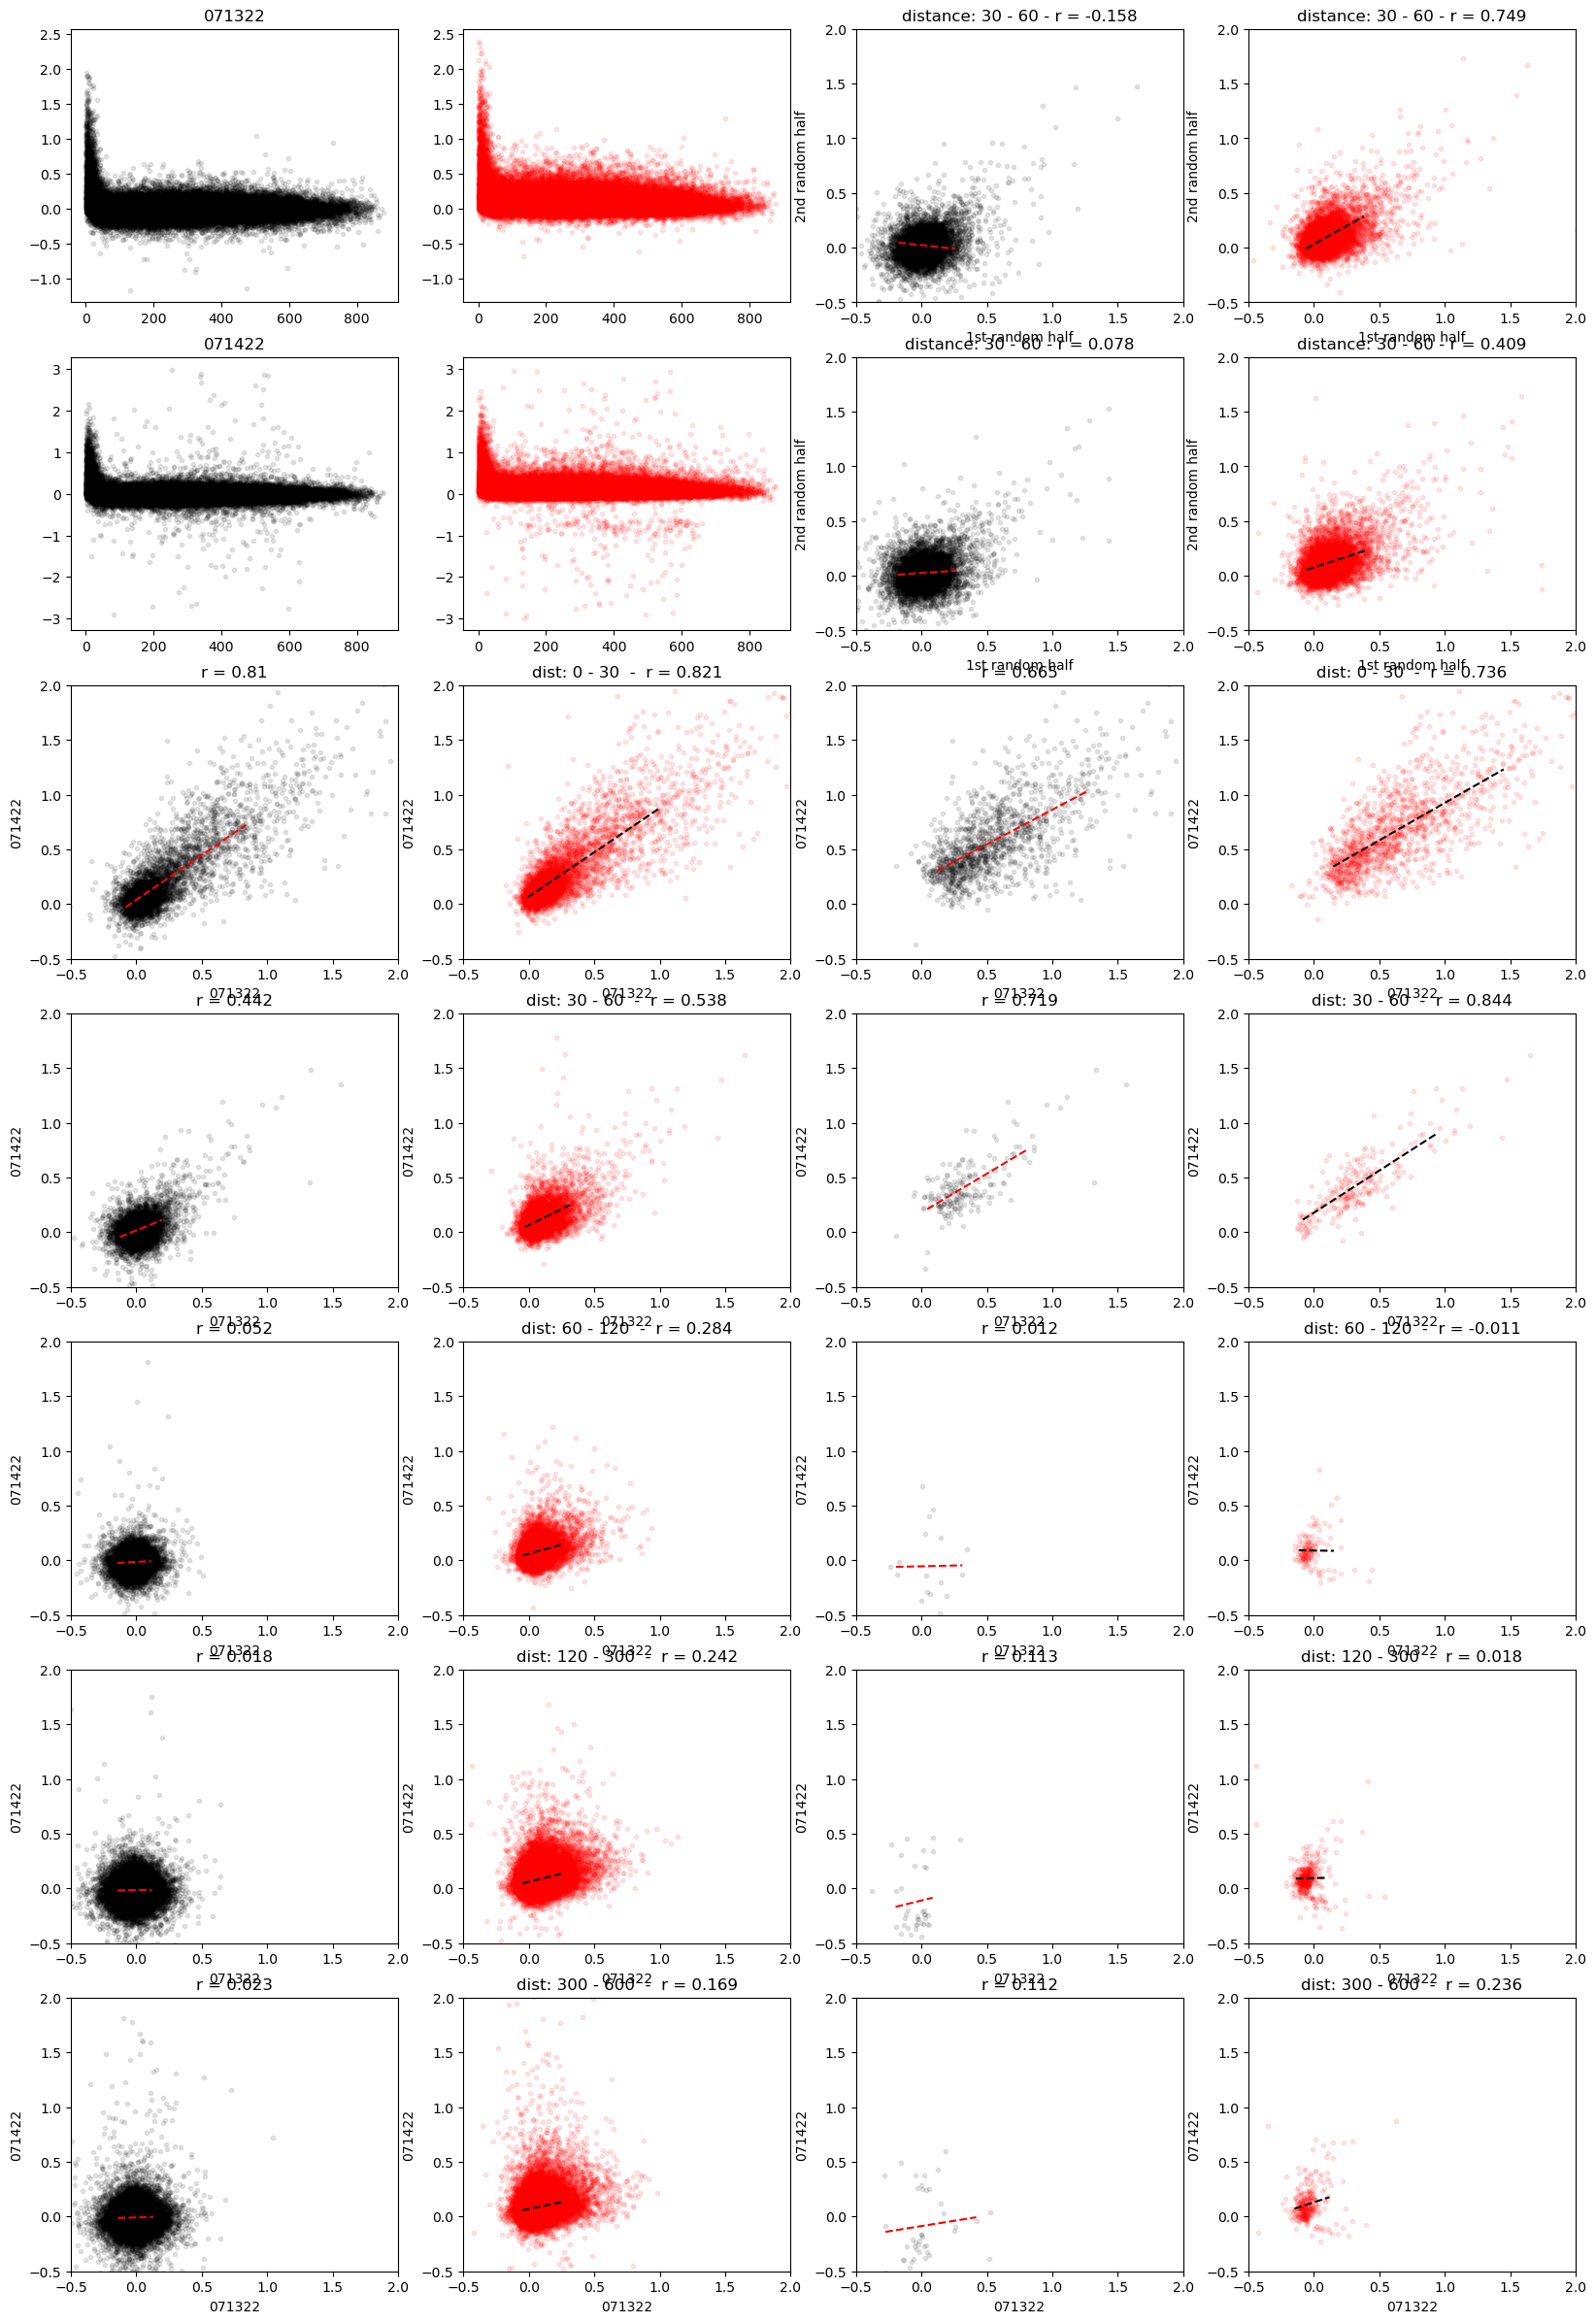

In [162]:
fig = plt.figure(figsize = [20, 30])
pval = .001
threshold = 3 # HOTFIX - absolute dF values above this value will be thrown out (noise) - have to fix this earlier in the analysis
tau_thresholds = [.5,5]
sessions_to_compare = ['071322','071422']
df_list = []
df_corr_list = []
tau_list = []
min_dist_list = [0,30,60,120,300]
max_dist_list = [30,60,120,300,600]
limits = [-.5,2]
plot_row_count = 2+len(min_dist_list)
min_dist = 30
max_dist = 60

for session_i in range(len(sessions_to_compare)):
    session = sessions_to_compare[session_i]
    distances_flat = np.asarray(distances_matrix).T.flatten()
    df_flat = np.asarray(photostim_data_dict[session]['mean_df']).flatten()
    df_corr_flat = np.asarray(photostim_data_dict[session]['mean_df_corr']).flatten()
    todel = (np.abs(df_flat)>threshold) | (np.abs(df_corr_flat)>threshold)
    df_flat[todel] = np.nan
    df_corr_flat[todel] = np.nan
    
    ax_distance_dependence = fig.add_subplot(plot_row_count,4,1+4*session_i)
    ax_distance_dependence.plot(distances_flat,df_flat,'k.',alpha = .1)
    ax_distance_dependence_corr = fig.add_subplot(plot_row_count,4,2+4*session_i,sharey = ax_distance_dependence)
    ax_distance_dependence_corr.plot(distances_flat,df_corr_flat,'r.',alpha = .1)
    ax_distance_dependence.set_title(session)
    
    needed = (distances_flat<max_dist) &(distances_flat>min_dist)
    
    ax_1st_second_half_nocorr = fig.add_subplot(plot_row_count,4,3+4*session_i)
    df_1 =  np.asarray(photostim_data_dict[session]['mean_df_1st_half']).flatten()[needed]
    df_2 =  np.asarray(photostim_data_dict[session]['mean_df_2nd_half']).flatten()[needed]
    ax_1st_second_half_nocorr.plot(df_1,df_2,'k.',alpha = .1)
    
    x = df_1
    y = df_2
    needed_ = (np.isnan(x)==False) & (np.isnan(y)==False)
    x = x[needed_]
    y = y[needed_]
    r = np.corrcoef(x,y)
    p = np.polyfit(x,y,1)
    xx = np.percentile(x,[5,95])
    yy = np.polyval(p,xx)
    ax_1st_second_half_nocorr.plot(xx,yy,'r--')
    ax_1st_second_half_nocorr.set_xlim(limits)
    ax_1st_second_half_nocorr.set_ylim(limits)
    ax_1st_second_half_nocorr.set_title('distance: {} - {} - r = {}'.format(min_dist,max_dist,np.round(r[1][0],3)))
    ax_1st_second_half_nocorr.set_xlabel('1st random half')
    ax_1st_second_half_nocorr.set_ylabel('2nd random half')
    
    ax_1st_second_half_corr = fig.add_subplot(plot_row_count,4,4+4*session_i)
    df_1 =  np.asarray(photostim_data_dict[session]['mean_df_corr_1st_half']).flatten()[needed]
    df_2 =  np.asarray(photostim_data_dict[session]['mean_df_corr_2nd_half']).flatten()[needed]
    ax_1st_second_half_corr.plot(df_1,df_2,'r.',alpha = .1)
    
    
    x = df_1
    y = df_2
    needed_ = (np.isnan(x)==False) & (np.isnan(y)==False)
    x = x[needed_]
    y = y[needed_]
    r = np.corrcoef(x,y)
    p = np.polyfit(x,y,1)
    xx = np.percentile(x,[5,95])
    yy = np.polyval(p,xx)
    ax_1st_second_half_corr.plot(xx,yy,'k--')
    ax_1st_second_half_corr.set_xlim(limits)
    ax_1st_second_half_corr.set_ylim(limits)
    ax_1st_second_half_corr.set_title('distance: {} - {} - r = {}'.format(min_dist,max_dist,np.round(r[1][0],3)))
    ax_1st_second_half_corr.set_xlabel('1st random half')
    ax_1st_second_half_corr.set_ylabel('2nd random half')

#     ax_corr_vs_noncorr = fig.add_subplot(plot_row_count,4,3+4*session_i)

#     ax_corr_vs_noncorr.plot(df_flat[needed],df_corr_flat[needed],'k.',alpha = .1)
#     ax_corr_vs_noncorr.set_title('distance: {} - {}'.format(min_dist,max_dist))
#     ax_corr_vs_noncorr.set_xlim(limits)
#     ax_corr_vs_noncorr.set_ylim(limits)
    
    
    df_list.append(df_flat[needed])
    df_corr_list.append(df_corr_flat[needed])
    
    tau_list.append(photostim_data_dict[session]['fitted_tau'])
for only_significant_connections in [False,True]:
    for i,(min_dist,max_dist) in enumerate(zip(min_dist_list,max_dist_list)):
        df_list = []
        df_corr_list = []
        percentiles_list = []
        percentiles_corr_list = []
        for session_i in range(len(sessions_to_compare)):
            session = sessions_to_compare[session_i]
            percentiles_list.append(np.asarray(photostim_data_dict[session]['percentile']).flatten())
            percentiles_corr_list.append(np.asarray(photostim_data_dict[session]['percentile_corr']).flatten())
        for session_i in range(len(sessions_to_compare)):
            session = sessions_to_compare[session_i]
            distances_flat = np.asarray(distances_matrix).T.flatten()
            df_flat = np.asarray(photostim_data_dict[session]['mean_df']).flatten()
            df_corr_flat = np.asarray(photostim_data_dict[session]['mean_df_corr']).flatten()
            todel = (np.abs(df_flat)>threshold) | (np.abs(df_corr_flat)>threshold)
            df_flat[todel] = np.nan
            df_corr_flat[todel] = np.nan
            if only_significant_connections:
                needed = (distances_flat<max_dist) &(distances_flat>min_dist) & ((np.min(percentiles_list,0)<pval) |(np.max(percentiles_list,0)>1-pval))
                needed_corr = (distances_flat<max_dist) &(distances_flat>min_dist) & ((np.min(percentiles_corr_list,0)<pval) |(np.max(percentiles_corr_list,0)>1-pval))
            else:
                needed = (distances_flat<max_dist) &(distances_flat>min_dist)
                needed_corr = (distances_flat<max_dist) &(distances_flat>min_dist)
            
            df_list.append(df_flat[needed])
            df_corr_list.append(df_corr_flat[needed_corr])
        if only_significant_connections:
            ax_d1d2 = fig.add_subplot(plot_row_count,4,11+4*i)
        else:
            ax_d1d2 = fig.add_subplot(plot_row_count,4,9+4*i)
        ax_d1d2.plot(df_list[0],df_list[1],'k.',alpha = .1)
        x = df_list[0]
        y = df_list[1]
        needed = (np.isnan(x)==False) & (np.isnan(y)==False)
        x = x[needed]
        y = y[needed]
        r = np.corrcoef(x,y)
        p = np.polyfit(x,y,1)
        xx = np.percentile(x,[5,95])
        yy = np.polyval(p,xx)
        ax_d1d2.plot(xx,yy,'r--')
        ax_d1d2.set_title('r = {}'.format(np.round(r[1][0],3)))
        ax_d1d2.set_xlabel(sessions_to_compare[0])
        ax_d1d2.set_ylabel(sessions_to_compare[1])
        if only_significant_connections:
            ax_d1d2_corr = fig.add_subplot(plot_row_count,4,12+4*i,sharex = ax_d1d2,sharey = ax_d1d2)
        else:
            ax_d1d2_corr = fig.add_subplot(plot_row_count,4,10+4*i,sharex = ax_d1d2,sharey = ax_d1d2)
        ax_d1d2_corr.plot(df_corr_list[0],df_corr_list[1],'r.',alpha = .1)
        x = df_corr_list[0]
        y = df_corr_list[1]
        needed = (np.isnan(x)==False) & (np.isnan(y)==False)
        x = x[needed]
        y = y[needed]
        r = np.corrcoef(x,y)
        p = np.polyfit(x,y,1)
        xx = np.percentile(x,[5,95])
        yy = np.polyval(p,xx)
        ax_d1d2_corr.plot(xx,yy,'k--')
        ax_d1d2_corr.set_title('dist: {} - {}  -  r = {}'.format(min_dist,max_dist,np.round(r[1][0],3)))
        ax_d1d2_corr.set_xlim(limits)
        ax_d1d2_corr.set_ylim(limits)
        ax_d1d2_corr.set_xlabel(sessions_to_compare[0])
        ax_d1d2_corr.set_ylabel(sessions_to_compare[1])



(0.5, 5.0)

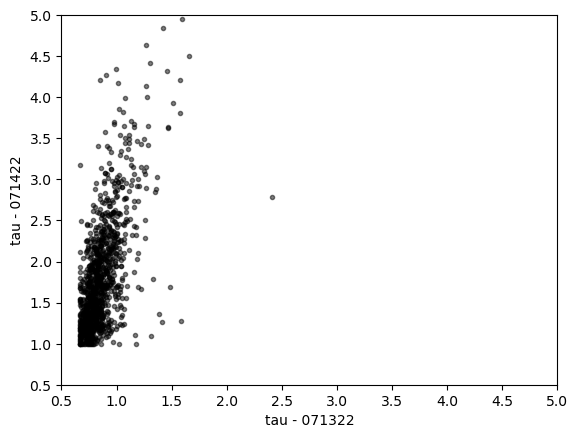

In [163]:
fig = plt.figure()
ax_tau = fig.add_subplot(1,1,1)
ax_tau.plot(tau_list[0],tau_list[1],'k.',alpha = .5)
ax_tau.set_xlabel('tau - {}'.format(sessions_to_compare[0]))
ax_tau.set_ylabel('tau - {}'.format(sessions_to_compare[1]))
ax_tau.set_xlim([.5,5])
ax_tau.set_ylim([.5,5])

In [1020]:
np.min(percentiles_corr_list,0)

array([0.7285, 0.5475, 0.4805, ..., 0.0325, 0.568 , 0.0525])

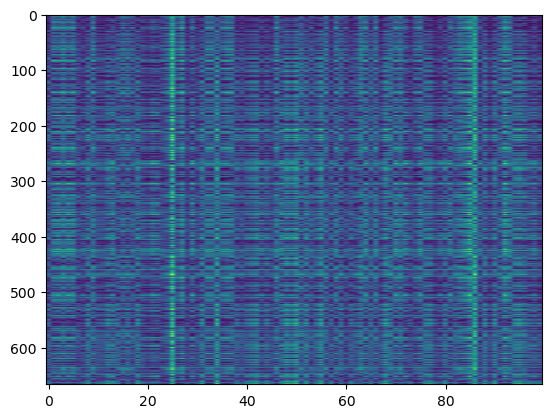

In [807]:
plt.imshow(np.asarray(distances_matrix).T,aspect = 'auto')

(-4.0, 8.0)

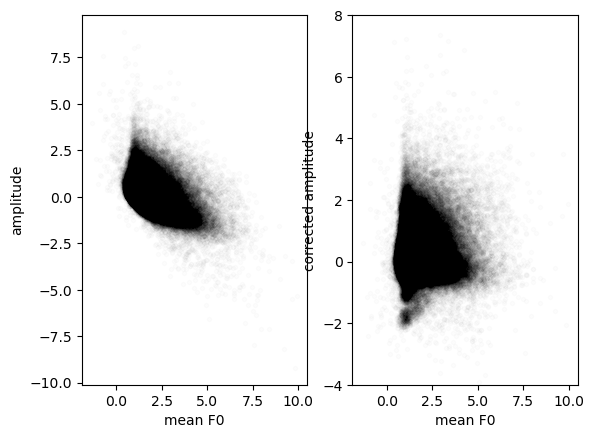

In [774]:
fig = plt.figure()
ax_ampl = fig.add_subplot(1,2,1)
ax_ampl.plot(np.concatenate(group_f0s_ALL),np.concatenate(group_amplitudes_ALL),'k.',alpha = .01)
ax_ampl.set_xlabel('mean F0')
ax_ampl.set_ylabel('amplitude')
ax_ampl_corr = fig.add_subplot(1,2,2)
ax_ampl_corr.plot(np.concatenate(group_f0s_ALL),np.concatenate(corrected_group_amplitudes_ALL),'k.',alpha = .01)
ax_ampl_corr.set_xlabel('mean F0')
ax_ampl_corr.set_ylabel('corrected amplitude')
ax_ampl_corr.set_ylim([-4,8])

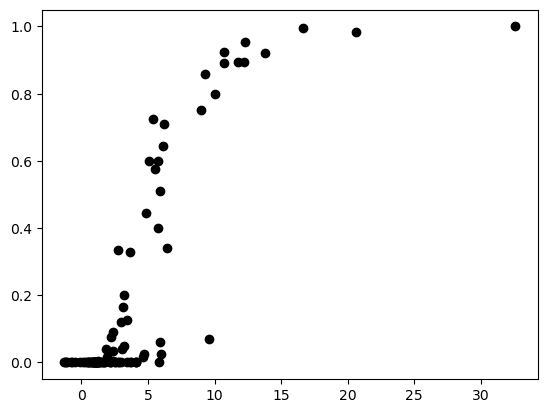

In [676]:

corrected_group_mean_amplitudes = []
for g in corrected_group_amplitudes_all:
    corrected_group_mean_amplitudes.append(np.nanmean(g))
plt.plot(corrected_group_mean_amplitudes,group_percentiles,'ko')

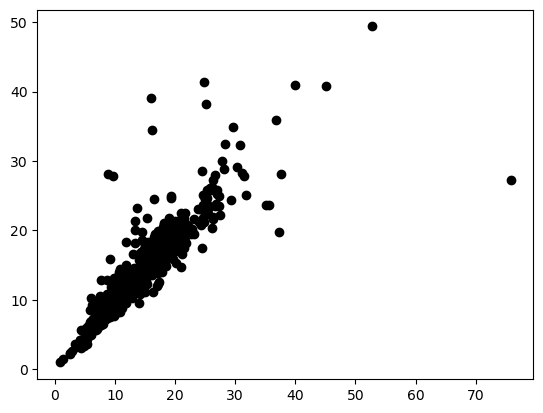

In [599]:
# calculated_taus_session = calculated_taus
# calculated_f0s_session = calculated_f0s
# calculated_taus_photostim = calculated_taus
# calculated_f0s_photostim = calculated_f0s
plt.plot(calculated_f0s_session,calculated_f0s_photostim,'ko')

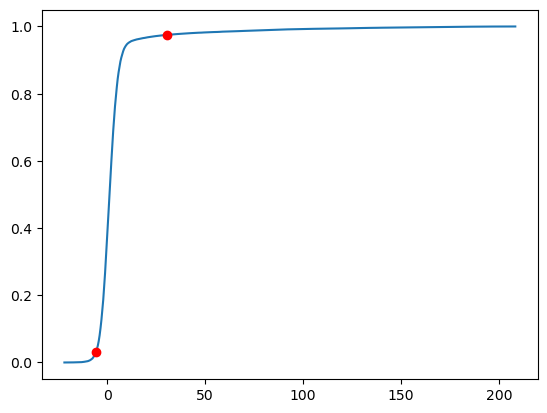

In [629]:
y,x = np.histogram(amplitudes_corrected,500)
x = np.mean([x[:-1],x[1:]],0)
pdf_y = np.cumsum(y)/np.sum(y)
idx_low = np.argmax(pdf_y>.025)
idx_high = np.argmax(pdf_y>.975)
plt.plot(x,pdf_y)
plt.plot(x[idx_low],pdf_y[idx_low],'ro')
plt.plot(x[idx_high],pdf_y[idx_high],'ro')

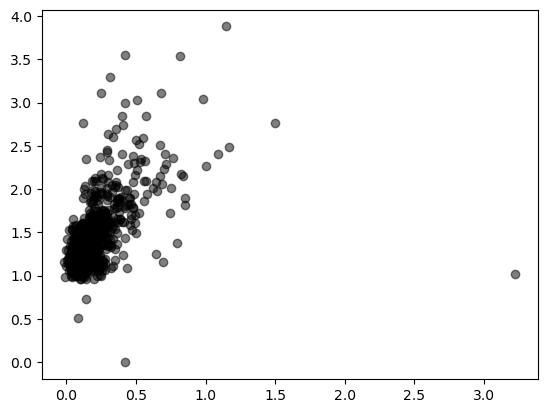

In [548]:
plt.plot(np.mean(dFF_photostim,1),calculated_taus,'ko',alpha = .5)

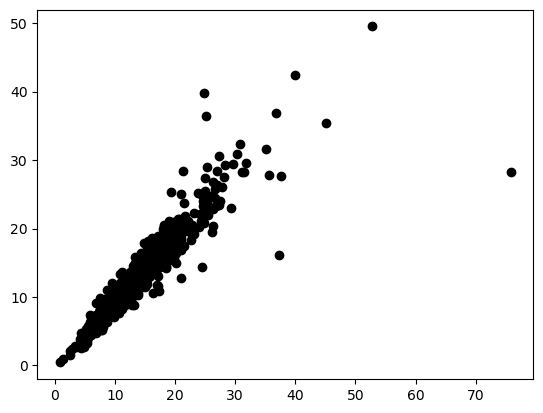

In [572]:
#plt.hist(1/np.asarray(calculated_taus),50)
plt.plot(calculated_f0s,F0_scalar_photostim,'ko')
#plt.plot(np.mean(dFF_photostim,1),-1*np.asarray(calculated_taus),'ko')

In [218]:
F_now.shape

(60, 12)

Text(0.5, 1.0, 'cell 16 - group 22 - tau = 3.43s')

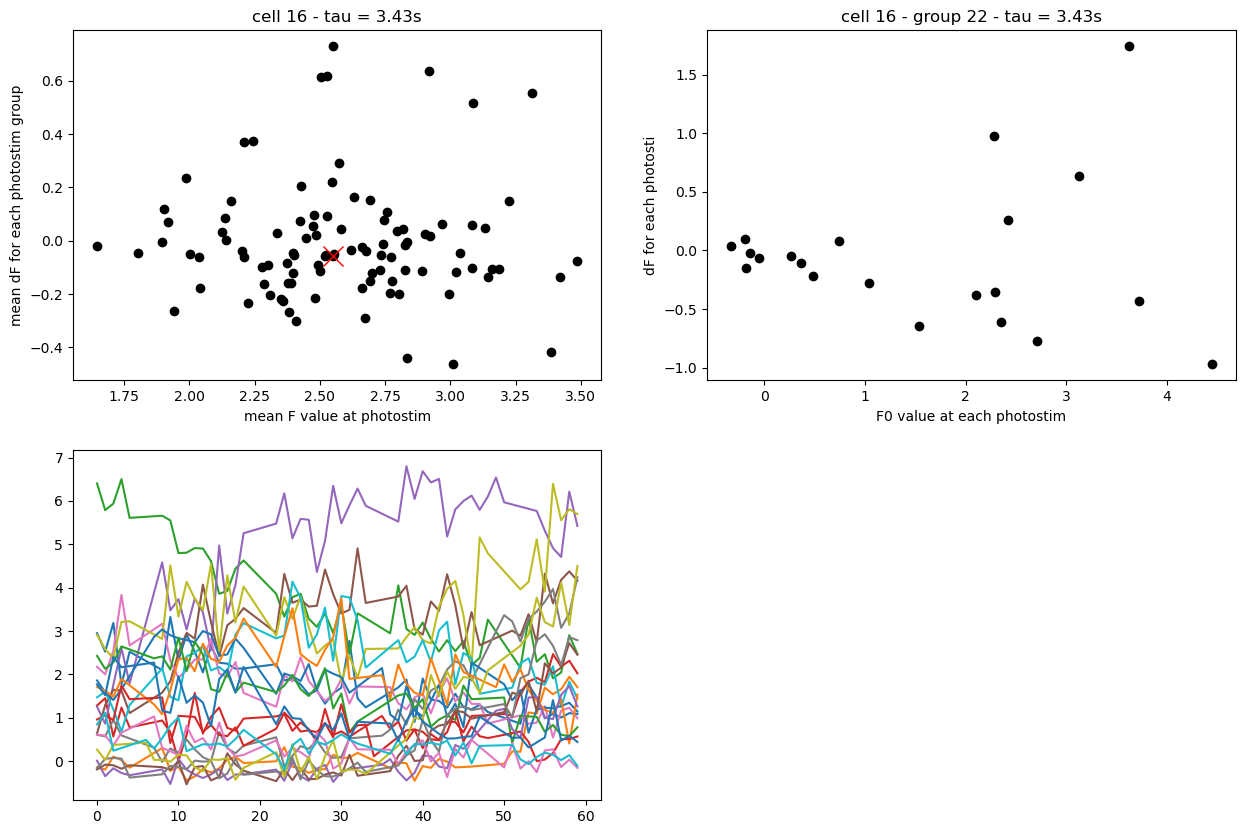

In [221]:
# show the F0 distribution of a given cell for different photostim groups
cell_idx = cell_idx_to_plot#2#16
group_idx = 22
session = '071422'

F_now = F_photostim_aligned[:,cell_idx,np.asarray(photostim_groups['group_order'])==group_idx] # this has to be generated beforehand - 



mean_f0 = np.concatenate(photostim_data_dict[session]['mean_f_start'][cell_idx])
mean_df = np.concatenate(photostim_data_dict[session]['mean_df'][cell_idx])
f0 = photostim_data_dict[session]['F_start'][cell_idx][group_idx]
df = photostim_data_dict[session]['dF'][cell_idx][group_idx]
F0 = photostim_data_dict[session]['F0'][cell_idx]
fig = plt.figure(figsize = [15,10])
ax=fig.add_subplot(2,2,1)
ax_group=fig.add_subplot(2,2,2)
ax_group_traces = fig.add_subplot(2,2,3)

ax_group_traces.plot((F_now-F0)/F0)
ax.plot(mean_f0,mean_df,'ko')
# needed = np.asarray(connectivity)[:,cell_idx]<0
# ax.plot(mean_f0,np.asarray(amplitude_matrix)[needed,cell_idx],'bo')
# needed = np.asarray(connectivity)[:,cell_idx]>0
# ax.plot(mean_f0,np.asarray(amplitude_matrix)[needed,cell_idx],'ro')
# time_constant_t = calculated_taus[cell_idx] #s
# timeConstant = 1000 * time_constant_t / (50*offset_photostim) # change in 10 steps
# #amplitude = amplitude+np.nanmean(DFF_averaged[:10,:],0)/timeConstant
# f0_range = np.arange(0,np.max(mean_f0),.1)
# decay_range = f0_range/timeConstant*-1
# ax.plot(f0_range,decay_range,'r-',label = 'cell decay')
# time_constant_t_gcamp = 1.2 #s
# timeConstant = 1000 * time_constant_t_gcamp / (50*offset_photostim) # change in 10 steps
# decay_range = f0_range/timeConstant*-1
# ax.plot(f0_range,decay_range,'b-',label = 'gcamp decay')
# ax.legend()

ax.set_xlabel('mean F value at photostim')
ax.set_ylabel('mean dF for each photostim group')
ax.set_title('cell {} - tau = {}s'.format(cell_idx,round(time_constant_t,2)))
ax.plot(mean_f0[group_idx],mean_df[group_idx],'rx',ms = 14,linewidth =6)

ax_group.plot((f0-F0)/F0,df/F0,'ko')

# time_constant_t = calculated_taus[cell_idx] #s
# timeConstant = 1000 * time_constant_t / (50*10) # change in 10 steps
# f0_range = np.arange(0,np.max(f0_notaveraged[cell_idx,:]),.1)
# decay_range = f0_range/timeConstant*-1
# ax_group.plot(f0_range,decay_range,'r-',label = 'cell decay')
# time_constant_t_gcamp = 1.2 #s
# timeConstant = 1000 * time_constant_t_gcamp / (50*10) # change in 10 steps
# decay_range = f0_range/timeConstant*-1
# ax_group.plot(f0_range,decay_range,'b-',label = 'gcamp decay')
# ax_group.legend()


ax_group.set_xlabel('F0 value at each photostim')
ax_group.set_ylabel('dF for each photosti')
ax_group.set_title('cell {} - group {} - tau = {}s'.format(cell_idx,group_idx,round(time_constant_t,2)))



In [678]:
calculated_taus

[2.0741390000690636]

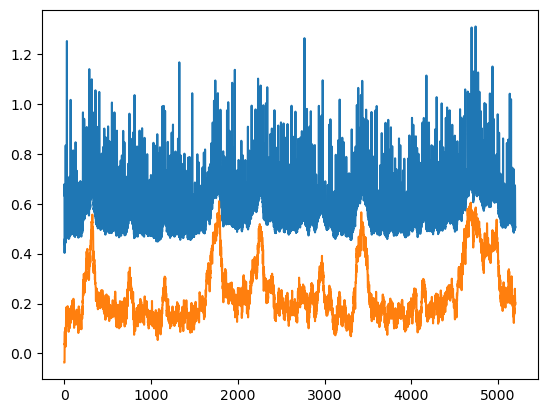

In [31]:
F = np.load(os.path.join(photostim_dir,'F.npy'))
dFF,F,F0,F0_scalar = load_and_calculate_dff(photostim_dir,
                                          scalar_f0 = False,
                                          photostim = True,
                                          correct_offset = False)
# im = plt.imshow(dFF_photostim[:,:500],aspect = 'auto')
# im.set_clim([-1,3])
plt.plot(np.mean(F[:,:5200],0)/np.mean(F[:50,:500]))
plt.plot(np.mean(dFF[:,:5200],0))

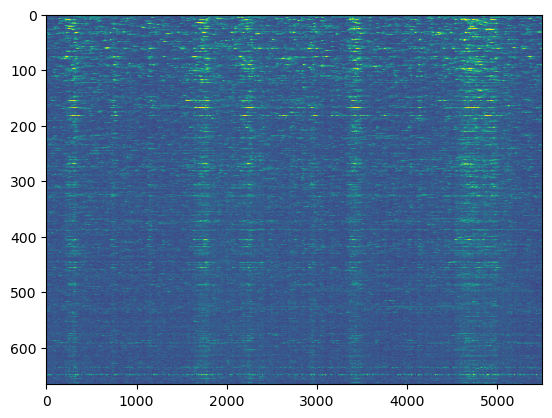

In [130]:

im = plt.imshow(dFF[:,:5500],aspect = 'auto')
im.set_clim([-1,3])

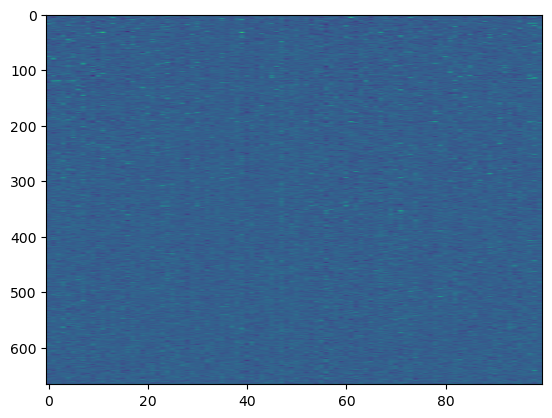

In [131]:
plt.imshow(np.asarray(amplitude_matrix).T/np.asarray(amplitude_std_matrix).T,aspect = 'auto')

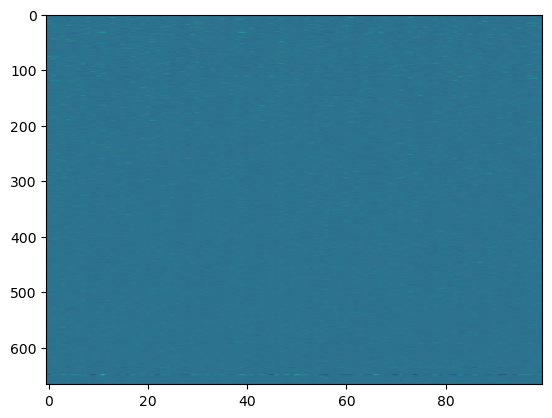

In [133]:
plt.imshow(np.asarray(amplitude_matrix).T,aspect = 'auto')

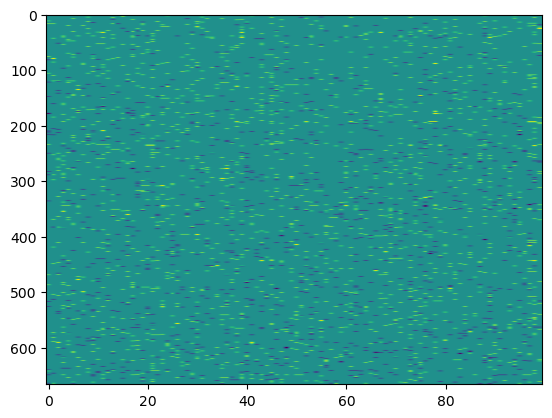

In [134]:
plt.imshow(np.asarray(connectivity).T,aspect = 'auto') # plot vs distance

In [157]:
a = np.nanstd(amplitudes_notaveraged,axis = 1)
a.shape

(775,)

In [101]:
DFF_normalized = DFF_now-np.nanmean(DFF_now[:baseline_length,:],0)
DFF_normalized.shape

/tmp/ipykernel_31553/836976387.py:1: RuntimeWarning: Mean of empty slice
  DFF_normalized = DFF_now-np.nanmean(DFF_now[:baseline_length,:],0)


(30, 775, 21)

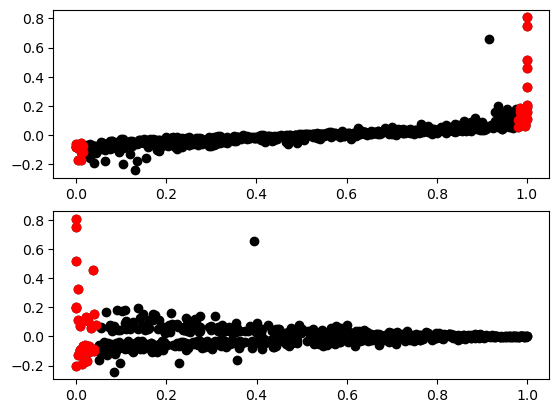

In [22]:
#plt.imshow(DFF_averaged.T,aspect = 'auto')
#plt.plot(np.mean(DFF_averaged_normalized,1))
# photostim_indices
percentiles = np.asarray(percentiles)
amplitdes = np.asarray(amplitudes)
ttest_ps = np.asarray(ttest_ps)

significant = ((percentiles<0.025) | (percentiles>.975))# & (ttest_ps <.05)
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(percentiles,amplitudes,'ko')
ax1.plot(percentiles[significant],amplitudes[significant],'ro')

significant = (ttest_ps <.05)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(ttest_ps,amplitudes,'ko')
ax2.plot(ttest_ps[significant],amplitudes[significant],'ro')